# 1. Introduction

#### Problem Statement

#### Motivation


#### Approach

#### Libraries

### Install Libraries

In [ ]:
import os # This line is necessary to set the working directory for the script
os.chdir(r"C:\Users\Zaid.Qarout\Toxic Comment Classification Challenge")


In [ ]:
pip install -r requirements.txt # Install the required packages from the requirements.txt file

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python -m spacy download en_core_web_sm # Download the small English model for spaCy
!python -m spacy download en_core_web_md # Download the medium English model for spaCy
!python -m textblob.download_corpora # Download the corpora for TextBlob

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.8.0/en_core_web_md-3.8.0-py3-none-any.whl (33.5 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_

## Importing Libraries and Defining Variables

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

from collections import Counter
from spacy import displacy
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    classification_report
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score, hamming_loss
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from wordcloud import WordCloud
from scipy.sparse import hstack, csr_matrix
from sklearn.utils.class_weight import compute_sample_weight
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier


# 2. Load Data

In [ ]:
TRAIN_DATA_PATH = 'data/train.csv'
TEST_DATA_PATH = 'data/test.csv'

df_train = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)

#### Observe the first 5 rows of the data set

In [ ]:
df_train.head() # Display the first few rows of the training data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### Check the shape of the dataset

In [75]:
print('Train shape', df_train.shape)

Train shape (159571, 8)


#### Check the column names

In [12]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

#### Check for missing data

In [13]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#### View label distribution
Sort values to see the most common labels first

In [14]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df_train[labels].sum().sort_values(ascending=False)

toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

# 3. Preprocessing and Data Cleaning

### Check data balance

C:\Users\Zaid.Qarout\AppData\Local\Temp\ipykernel_26208\3662670399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=label, ax=axes[i], palette='coolwarm')
C:\Users\Zaid.Qarout\AppData\Local\Temp\ipykernel_26208\3662670399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=label, ax=axes[i], palette='coolwarm')
C:\Users\Zaid.Qarout\AppData\Local\Temp\ipykernel_26208\3662670399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=label, ax=axes[i], palette='coolwarm')
C:\Users\Zaid

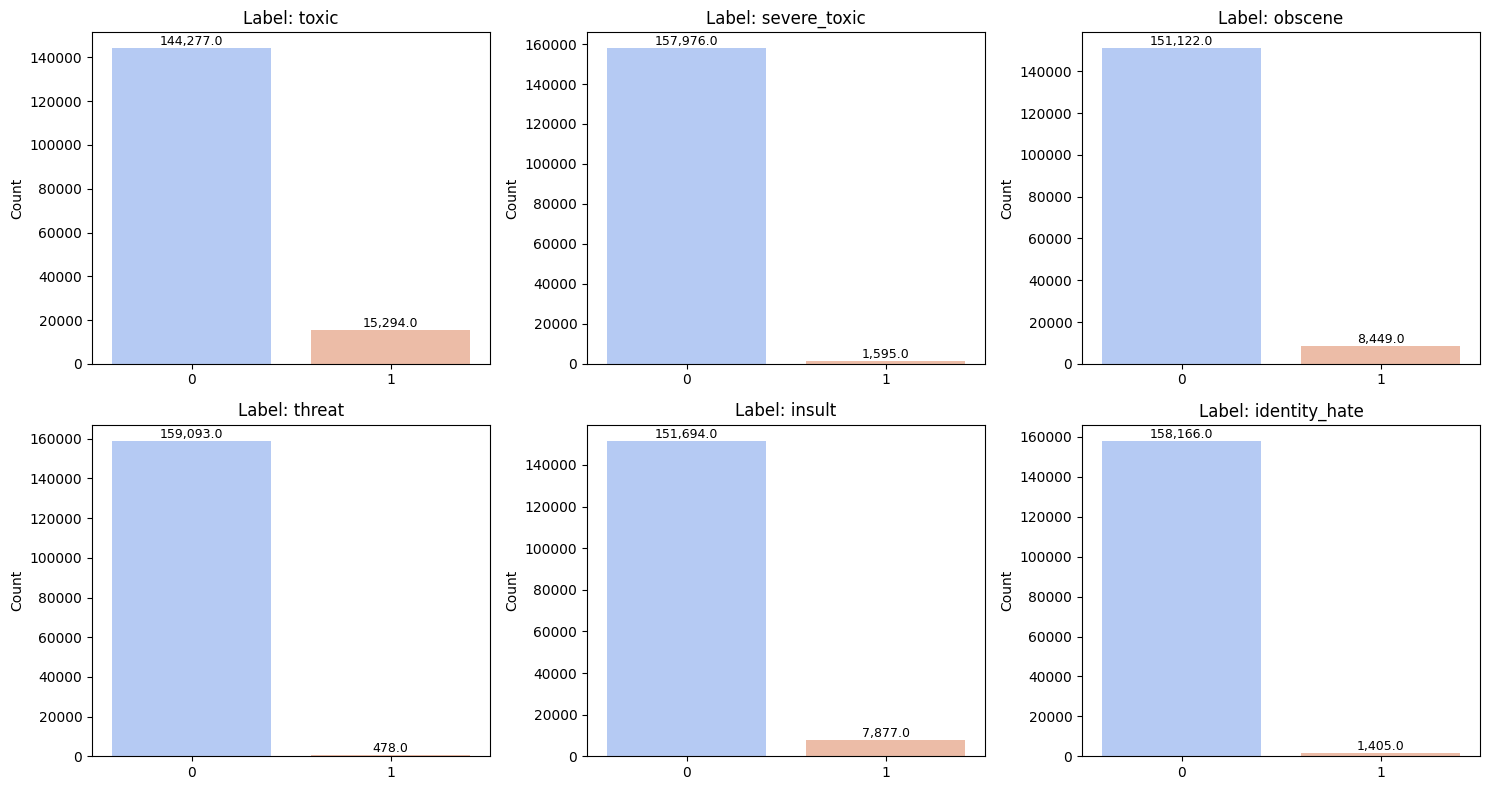

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot count of each label
for i, label in enumerate(labels):
    sns.countplot(data=df_train, x=label, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Label: {label}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    # Annotate the bars with counts
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height:,}', (p.get_x() + p.get_width()/2., height),
                         ha='center', va='bottom', fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()


There is a clear imbalance of data which can cause the majority class to be predicted more than the others. The score is deceptively high in accuracy but low in recall or F1-score for the rare class and struggle with ROC/AUC or confusion matrix interpretation since the false negatives are the majority. Therefore, this will be considered later on when training the models. For example, adding `class_weight='balanced'` to logistic regression will tell the model to penalise mistakes on minority classes more which balances the loss function.

### Variables

In [ ]:
# fast, vector-ready model (has 300-d GloVe vectors)
nlp = spacy.load("en_core_web_md", disable=["parser"]) # Load the spaCy model with only the tokeniser, disabling the parser for speed

if "sentencizer" not in nlp.pipe_names: # Check if the sentencizer is already in the pipeline
    nlp.add_pipe("sentencizer")

### Clean the data

In [ ]:
def clean(text):
    """Function to clean the text data using spaCy.
    Args:
        text (str): The input text to be cleaned.
    Returns: the cleaned text as a string."""
    PUNCTUATION_TABLE = str.maketrans("", "", string.punctuation.replace("'", ""))  # Remove punctuation except apostrophes
    return text.lower().translate(PUNCTUATION_TABLE).replace('\n', ' ').replace('\r', ' ').strip()

### Tokenise the data

In [ ]:
# Define regex patterns for token filtering
url_pattern = re.compile(r'https?://\S+|www\.\S+')
email_pattern = re.compile(r'\b[\w\.-]+?@\w+?\.\w+?\b') # e.g., someone@email.com
repetition_pattern = re.compile(r'(.)\1{3,}')  # e.g., 'aaaa', 'bbbb'
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "]+", flags=re.UNICODE
)

def normalise_text(text):
    # Replace accents/diacritics with base letters (e.g., ç → c, ü → u)
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8') 

def tokenise(doc):
    """Function to tokenise the text data using spaCy.
    Args:
        doc (str): The text to be tokenised.
    Returns: a list of tokens (lemmas) as strings."""
    # Tokenise the document using spaCy
    tokens = []
    for token in doc: # Iterate through each token in the document
        lemma = token.lemma_.lower() # Convert lemma to lowercase
        norm = normalise_text(lemma).strip()  # Normalise and strip whitespace

        # Skip empty tokens or tokens that are not alphanumeric
        if not norm or not norm.isalnum():
            continue

        # Re-check stop words after lemmatisation
        if nlp.vocab[norm].is_stop:
            continue

        if (
            not token.is_punct and  # Exclude punctuation
            not token.is_space and  # Exclude spaces
            len(norm.strip()) > 1 and # Exclude single-character tokens (e.g., 'a', 'I' etc. except for contractions like "don't", "can't" etc. which are handled by the tokenisation process)
            not url_pattern.match(norm) and # Exclude tokens that match the URL pattern
            not email_pattern.match(norm) and  # Exclude tokens that match the email pattern
            not repetition_pattern.match(norm) and # Exclude tokens that match the repetition pattern (e.g., 'aaaa', 'bbbb' etc.)
            not emoji_pattern.match(norm) and # Exclude tokens that match the emoji pattern (e.g., '😊', '😂' etc.)
            not re.match(r'^\d+$', norm) and # Exclude tokens that are purely numeric (e.g., '123', '4567' etc. but keep numbers in words like "one", "two" etc. which are handled by the tokenisation process)
            not re.match(r"^\d{1,3}(\.\d{1,3}){3}$", norm) and # Exclude tokens that are IP addresses (e.g., 62.158.73.165)'
            token.ent_type_ not in {'PERSON', 'ORG', 'GPE'} # Exclude named entities like persons, organisations, and geopolitical entities
        ):
            tokens.append(norm) # Append the normalised token to the list


    return tokens # Return the list of tokens

### Get sentiment scores

In [19]:
def get_sentiment_scores(text):
    """
    Function to get the sentiment scores of the text data.
    Args:
        text (str): The text to be processed.
    Returns: a dictionary with polarity and subjectivity scores."""
    blob = TextBlob(text)  # Create a TextBlob object
    return {'polarity': blob.sentiment.polarity, 'subjectivity': blob.sentiment.subjectivity}  # Return the sentiment scores as a dictionary

# 4. Feature engineering

In [ ]:
# Extract features for training/EDA (full) or fast inference (minimal for test)
def extract_features(text, is_train=True, nlp_model=nlp):
    """Extract features for training/EDA (full) or fast inference (minimal for test).
    
    Args:
        text (str): The input comment.
        is_train (bool): True = full feature set (for EDA + training), False = minimal (for test/Kaggle submission).
        nlp_model (spacy.lang): The spaCy NLP model to use for processing the text.
        
    Returns:
        dict: Extracted features.
    """

    # Check if the NLP model is provided and raise an error if not
    if nlp_model is None: 
            raise ValueError("You must provide an NLP model via `nlp_model`.")
    
    # Handle empty or invalid input
    if not isinstance(text, str) or not text.strip():
        return {
            'cleaned_text': '', # Return empty cleaned text for invalid input
            'tokens': [], # Return empty tokens for invalid input
            'sentiment_scores': {'polarity': 0.0, 'subjectivity': 0.0} # Return empty features for invalid input
        }

    doc = nlp_model(text)  # full pipeline (parser/tagger must be enabled)

    # Base features that are always needed
    base = {
        'cleaned_text': clean(text), # Clean the text using the clean function
        'tokens': tokenise(doc), # Tokenise the document using the tokenise function
        'sentiment_scores': get_sentiment_scores(text), # Get sentiment scores
    }

    # Extra features only needed for training / EDA / visualizations
    if is_train: # Check if the features are for training
        base.update({
            'pos_tags': [(token.text, token.pos_) for token in doc], # Extract part-of-speech tags as a list of tuples (text, pos)
            'ner': [(ent.text, ent.label_) for ent in doc.ents], # Extract named entities as a list of tuples (text, label)
        })

    return base # Return the extracted features as a dictionary


### Apply data cleaning methods

In [ ]:
# ============ DEVELOPMENT MODE =========== #
# (a small sample to save time)

# df_small = df_train.sample(n=5000, random_state=42)
# features = df_small['comment_text'].apply(extract_features)
# features_df = pd.json_normalize(features, sep='_')

# df_small = df_small.reset_index(drop=True)
# features_df = features_df.reset_index(drop=True)

# df = pd.concat([df_small, features_df], axis=1)
# ========================================= #

# ============ FULL DATASET MODE (SUBMISSION) =========== #
if os.path.exists("processed_full_dataset.pkl"):
    print("Loading preprocessed data...")
    df = pd.read_pickle("processed_full_dataset.pkl")
else:
    print("Running preprocessing pipeline...")
    features = df_train['comment_text'].apply(extract_features)
    features_df = pd.json_normalize(features, sep='_')

    df_train = df_train.reset_index(drop=True)
    features_df = features_df.reset_index(drop=True)

    df = pd.concat([df_train, features_df], axis=1)

    # Save for future runs
    df.to_pickle("processed_full_dataset.pkl")
    print("Saved preprocessed data to `processed_full_dataset.pkl`")
# ======================================================== #


Running preprocessing pipeline...
Saved preprocessed data to `processed_full_dataset.pkl`


In [22]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text,tokens,pos_tags,ner,sentiment_scores_polarity,sentiment_scores_subjectivity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...,"[explanation, edit, username, hardcore, metall...","[(Explanation, NOUN), (\n, SPACE), (Why, SCONJ...","[(New York Dolls, GPE), (FAC, ORG), (now.89.20...",0.136364,0.454545
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww he matches this background colour i'm se...,"[match, background, colour, seemingly, stick, ...","[(D'aww, PROPN), (!, PUNCT), (He, PRON), (matc...","[(21:51, January 11, DATE), (2016, DATE), (UTC...",0.287500,0.550000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i'm really not trying to edit war it's...,"[hey, man, try, edit, war, guy, constantly, re...","[(Hey, INTJ), (man, NOUN), (,, PUNCT), (I, PRO...",[],0.160000,0.406667
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can't make any real suggestions on impr...,"[real, suggestion, improvement, wonder, sectio...","[("", PUNCT), (\n, SPACE), (More, ADJ), (\n, SP...","[(first, ORDINAL), (Wikipedia, PERSON)]",0.200000,0.301042
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"[sir, hero, chance, remember, page]","[(You, PRON), (,, PUNCT), (sir, PROPN), (,, PU...",[],0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and for the second time of asking when your vi...,"[second, time, asking, view, completely, contr...","[("", PUNCT), (:, PUNCT), (:, PUNCT), (:, PUNCT...","[(second, ORDINAL)]",0.228571,0.557143
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself that is a ...,"[ashamed, horrible, thing, talk, page]","[(You, PRON), (should, AUX), (be, AUX), (asham...","[(128.61.19.93, CARDINAL)]",-1.000000,1.000000
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm theres no actual article for pro...,"[umm, actual, article, prostitution, ring, cru...","[(Spitzer, PROPN), (\n\n, SPACE), (Umm, PROPN)...","[(Spitzer, ORG)]",0.000000,0.100000
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...,"[look, like, actually, speedy, version, delete...","[(And, CCONJ), (it, PRON), (looks, VERB), (lik...","[(first, ORDINAL)]",0.125000,0.216667


# 5. Exploratory data analysis (EDA)

In [ ]:
eda_rows, top_words = [], {}

for lab in labels:
    sub = df[df[lab] == 1] # Filter the DataFrame for the current label
    n_comments = len(sub) # Count the number of comments for the current label
    n_sentences = sub["comment_text"].str.count(r"[.!?]").sum() # Count the number of sentences in the comments
    
    # Use list comprehension instead of np.concatenate
    all_tokens = [tok for tokens in sub["tokens"].dropna() for tok in tokens] # Flatten the list of tokens
    n_tokens = len(all_tokens) # Count the total number of tokens for the current label

    top_words[lab] = [w for w, _ in Counter(all_tokens).most_common(20)] # Get the top 20 most common tokens for the current label
    eda_rows.append((lab, n_comments, n_sentences, n_tokens)) # Collect the data for EDA

eda_df = pd.DataFrame(eda_rows, columns=["label", "comments", "sentences", "tokens"])
display(eda_df) # Display the EDA DataFrame

# Display top-20 tokens per class
pd.DataFrame(top_words).T.style.set_caption("Top-20 tokens per class")

,label,comments,sentences,tokens
0,toxic,15294,120035,327275
1,severe_toxic,1595,33133,58171
2,obscene,8449,62418,178978
3,threat,478,10384,10662
4,insult,7877,59246,162824
5,identity_hate,1405,8410,36472


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
toxic,fuck,suck,like,shit,nigger,fucking,hate,ass,faggot,page,know,gay,edit,die,fat,people,moron,block,article,cunt
severe_toxic,fuck,suck,shit,ass,faggot,fucking,die,cunt,nigger,cock,bitch,fucksex,yourselfgo,kill,cocksucker,piece,asshole,bastard,gay,eat
obscene,fuck,suck,shit,fucking,nigger,ass,cunt,faggot,like,bitch,know,fat,page,cock,edit,die,bullshit,block,asshole,stupid
threat,die,ass,kill,block,supertr0ll,fuck,page,ban,fucking,talk,murder,live,fuckin,blank,pathetic,forever,fool,respect,shit,hope
insult,fuck,suck,nigger,fucking,faggot,ass,fat,shit,cunt,like,moron,hate,hi,bitch,jew,know,die,page,stupid,edit
identity_hate,nigger,fat,jew,fuck,gay,die,faggot,suck,fucking,huge,shit,like,cunt,stupid,ass,mexican,bitch,niggas,hate,jewish


## Linguistic analysis

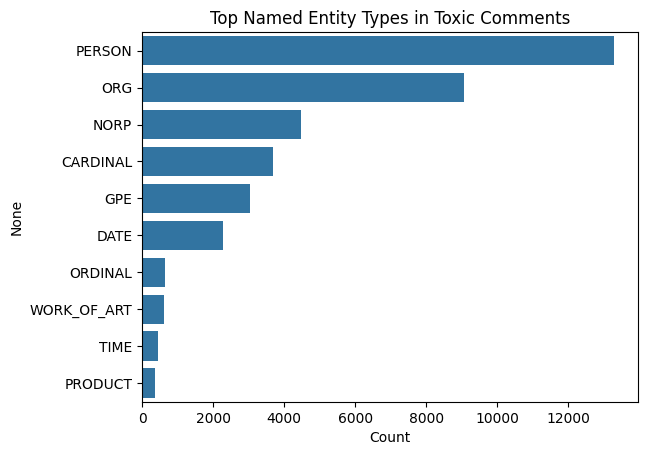

In [ ]:
# Visualise the top named entity types in toxic comments
toxic_ents = df[df["toxic"] == 1]["ner"].explode() # Count entity types in toxic comments
ent_types = [ent[1] for ent in toxic_ents if isinstance(ent, tuple)] # Extract named entity types
ent_counts = pd.Series(ent_types).value_counts().head(10) # Count the top 10 named entity types

# Barplot
sns.barplot(x=ent_counts.values, y=ent_counts.index)
plt.title("Top Named Entity Types in Toxic Comments")
plt.xlabel("Count")
plt.show()

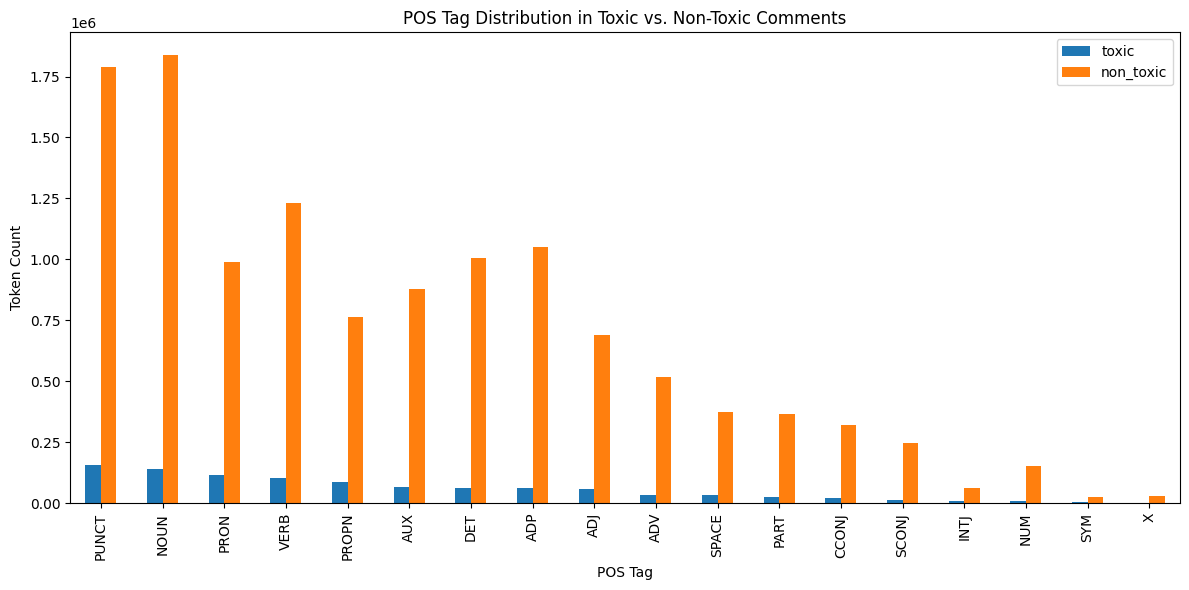

In [ ]:
# Visualise the distribution of POS tags in toxic vs. non-toxic comments
def get_pos_distribution(tagged_column):
    """Function to get the distribution of POS tags in a tagged column.
    Args:
        tagged_column (pd.Series): A pandas Series containing lists of tuples (token, POS tag).
    Returns:
        Counter: A Counter object with POS tags as keys and their counts as values."""
    
    pos_counts = Counter()
    for row in tagged_column.dropna():
        for tok, tag in row:
            if isinstance(tok, str) and isinstance(tag, str):
                pos_counts[tag] += 1
    return pos_counts

toxic_pos = get_pos_distribution(df[df["toxic"] == 1]["pos_tags"])
non_toxic_pos = get_pos_distribution(df[df["toxic"] == 0]["pos_tags"])

# Build into DataFrame
pos_df = pd.DataFrame([toxic_pos, non_toxic_pos], index=["toxic", "non_toxic"]).fillna(0).T
pos_df = pos_df.sort_values(by="toxic", ascending=False)

# Plot
pos_df.plot(kind="bar", figsize=(12, 6), title="POS Tag Distribution in Toxic vs. Non-Toxic Comments")
plt.ylabel("Token Count")
plt.xlabel("POS Tag")
plt.tight_layout()
plt.show()

Toxic comments contain fewer nouns, verbs, and adjectives compared to non-toxic ones. This suggests they’re often shorter, less descriptive, and more abrupt - possibly relying more on punctuation or aggressive phrasing than structured language.

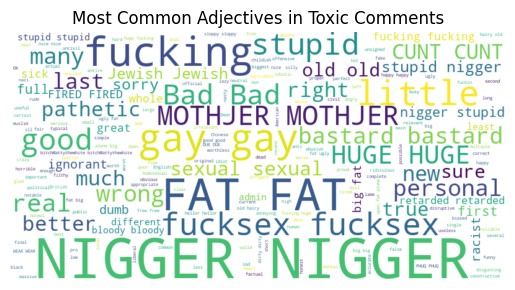

In [ ]:
# Visualise the most common adjectives in toxic comments
adjs = []
for row in df[df["toxic"] == 1]["pos_tags"]:
    if isinstance(row, list):
        adjs.extend([tok for tok, tag in row if tag == "ADJ" and isinstance(tok, str)]) # Collect adjectives from the POS tags

if adjs:
    text = " ".join(adjs)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) # Generate the word cloud from the adjectives
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Adjectives in Toxic Comments")
    plt.show()
else:
    print("No adjectives found in the data. WordCloud skipped.")


The most common adjectives in toxic comments are highly offensive, describing targets with insults related to appearance, identity, or behaviour

In [ ]:
# Visualise the dependency parse of toxic comments
# Select a few toxic examples for visualisation
toxic_examples = df[df["toxic"] == 1]["comment_text"].dropna().sample(3, random_state=42) # Select 3 random toxic comments
nlp_with_parser = spacy.load("en_core_web_md")

for text in toxic_examples:
    doc = nlp_with_parser(text)
    print(f"\nText: {text[:100]}...")
    displacy.render(doc, style="dep", jupyter=True, options={"compact": True})


Text: Hi! 

I wanna rape you!...



Text: Terrorize 
I will terrorise you for as long as you live - you are an arrogant, disgusting and rude e...



Text: Being blocked

So that's your idea of mediation, is it? R Lopez can run amok through Wikipedia with ...


The dependency parsing visualization highlights how toxic language is syntactically structured. This show how the grammatical structure reinforces intent.

## Bar chart of top tokens

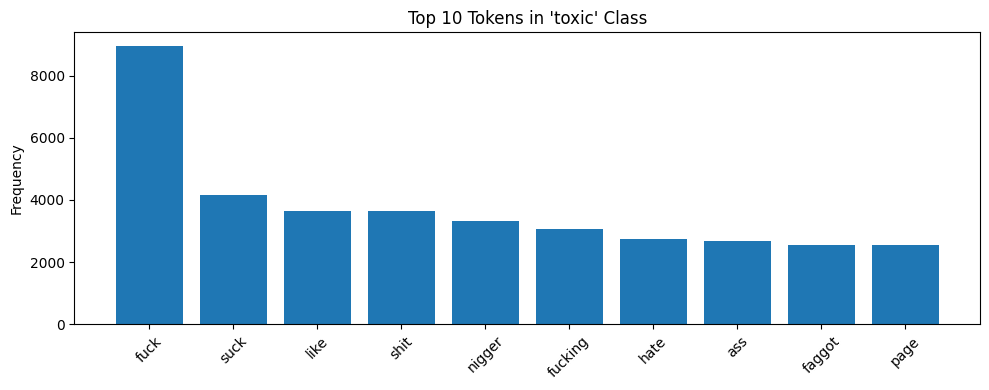

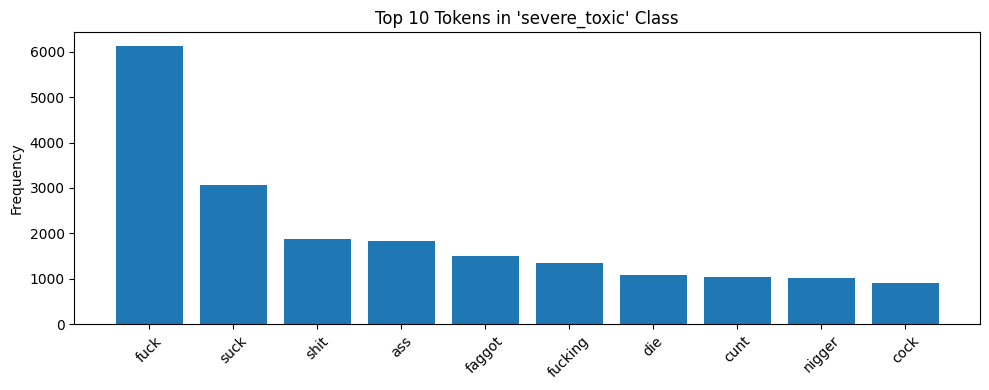

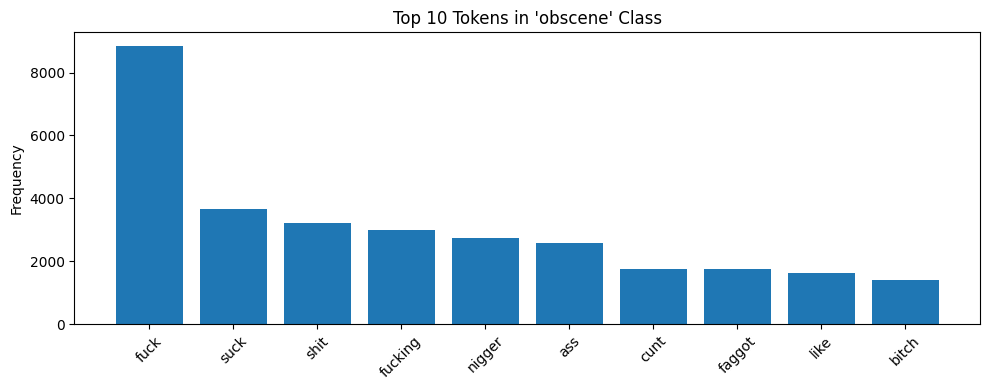

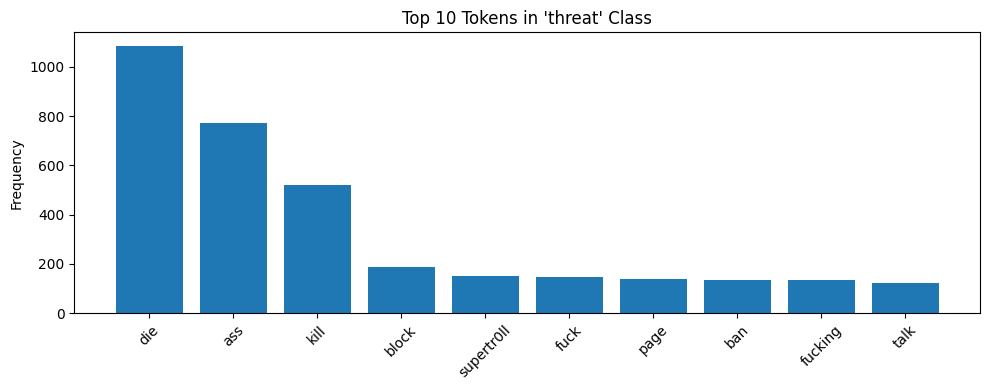

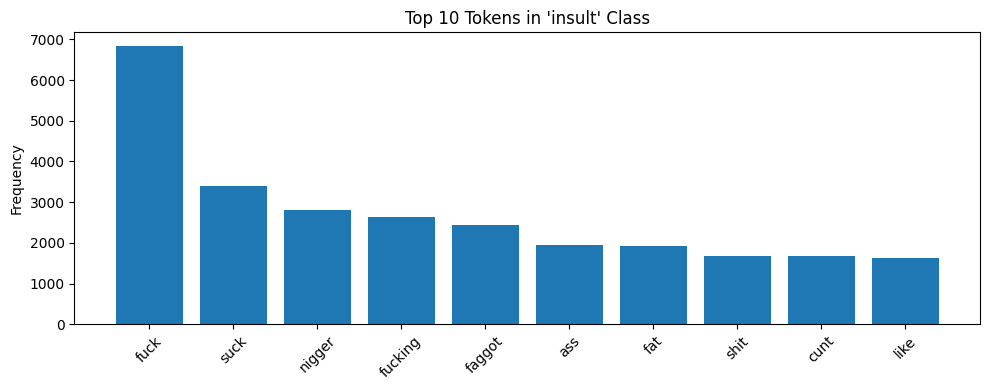

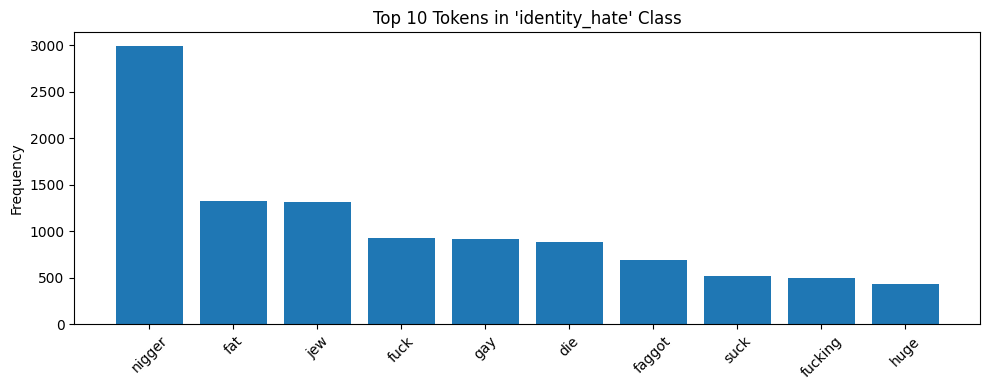

In [ ]:
# Visualise the top 10 tokens per class
# Create a bar plot for the top 10 tokens in each class
for label, tokens in top_words.items():
    token_counts = Counter(np.concatenate(df[df[label]==1]['tokens'].values))
    top = token_counts.most_common(10)
    words, freqs = zip(*top)

    plt.figure(figsize=(10, 4))
    plt.bar(words, freqs)
    plt.title(f"Top 10 Tokens in '{label}' Class")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

The above data shows the topic 10 tokens per class to confirm that the preprocessing perserved the key insults/toxic words.

## Word Clouds per toxicity class

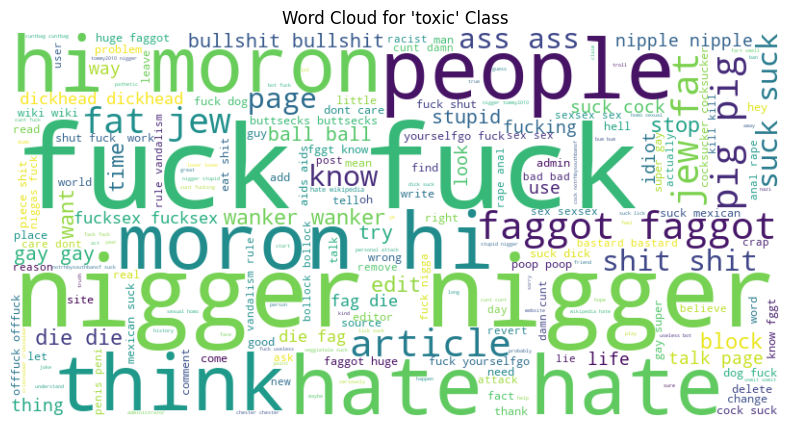

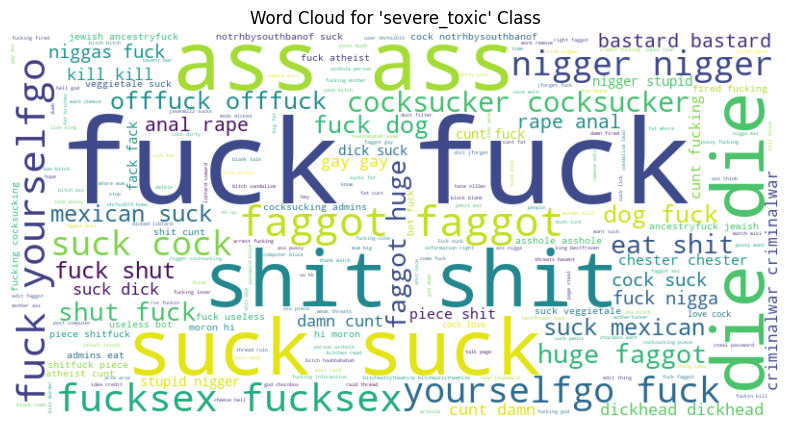

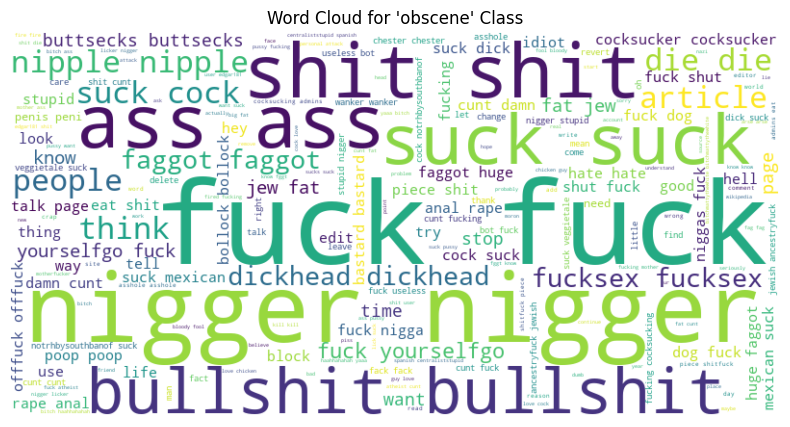

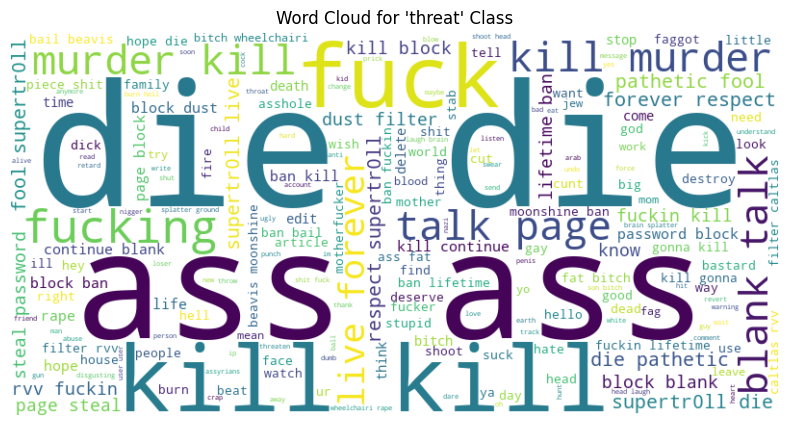

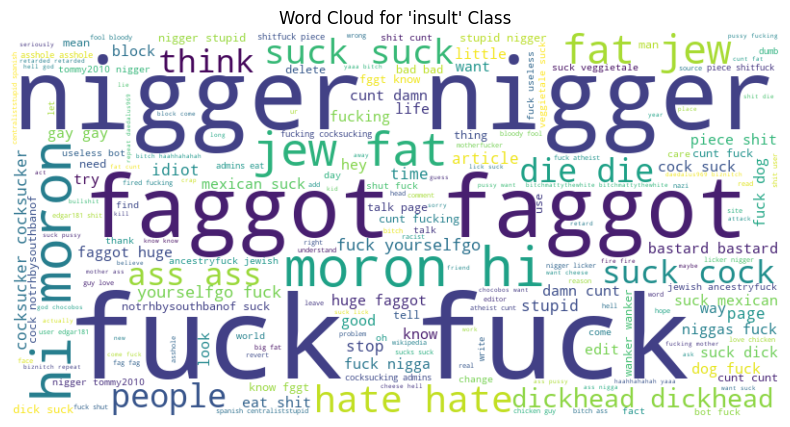

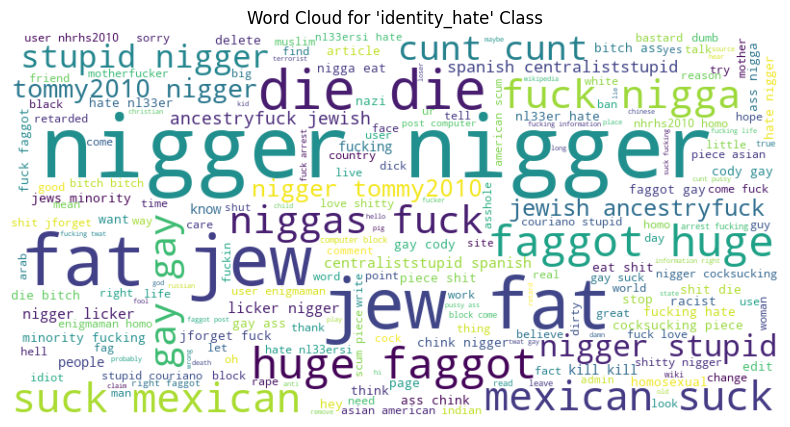

In [ ]:
# Visualise the word cloud for each class
# Generate a word cloud for each class based on the tokens
for label in labels:
    tokens = df[df[label] == 1]['tokens'].explode().dropna()
    text = " ".join(tokens)
    
    if not text.strip():
        continue  # Skip empty classes
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{label}' Class")
    plt.show()

The above word clouds show the most frequent words in each toxic class, highlighting the key terms associated with different types of toxicity. This helps in understanding the language patterns used in toxic comments.

Word clouds are also useful in reports or presentations to show non-technical audiences what kind of language the model is exposed to per class.

# 6. Text vectorisation (TF-IDF and WordEmbeddings)

### TF-IDF (Term Frequency - Inverse Document Frequency)

Generate TF-IDF features from the text data and sentiment scores for training and validation sets

In [ ]:
# X is input features and y is the output labels

# Prepare the text and labels
X_text_tfidf = df['tokens'].apply(lambda tokens: " ".join(tokens))
y_tfidf = df[labels]  # Target labels

# Extract sentiment features
X_sentiment_tfidf = df[['sentiment_scores_polarity', 'sentiment_scores_subjectivity']]

# Train-test split (make sure to split both X_text and sentiment)
X_train_text_tfidf, X_val_text_tfidf, y_train_tfidf, y_val_tfidf, X_train_sent_tfidf, X_val_sent_tfidf = train_test_split(
    X_text_tfidf, y_tfidf, X_sentiment_tfidf, test_size=0.2, random_state=42
)

# Fit TF-IDF vectorizer on training text
tfidf_vec = TfidfVectorizer(
    lowercase=False, # Skip internal lower-casing
    min_df=2, # Minimum document frequency to ignore rare words
    max_features=30_000, # Maximum number of features to consider
    ngram_range=(1,2) # Vectoriser to convert text to TF-IDF features
)  # Vectoriser to convert text to TF-IDF features
# Note: tokenizer is a function that takes a string and returns a list of tokens

X_tfidf_train = tfidf_vec.fit_transform(X_train_text_tfidf)
X_tfidf_val  = tfidf_vec.transform(X_val_text_tfidf)

# Convert sentiment features to sparse format and combine
X_sent_train_sparse = csr_matrix(X_train_sent_tfidf.values)
X_sent_val_sparse = csr_matrix(X_val_sent_tfidf.values)

# Combine TF-IDF and sentiment features
X_combined_tfidf_train = hstack([X_tfidf_train, X_sent_train_sparse])
X_combined_tfidf_val = hstack([X_tfidf_val, X_sent_val_sparse])

Generating TF-IDF features from scratch...


['tfidf_vectoriser.pkl']

### Word Embeddings

In [ ]:
# File paths
TRAIN_EMBED_PATH = "X_embed_train.npy"
VAL_EMBED_PATH = "X_embed_val.npy"

# Extract sentiment features and labels
X_sentiment_embed = df[['sentiment_scores_polarity', 'sentiment_scores_subjectivity']]
y_embed = df[labels]

if os.path.exists(TRAIN_EMBED_PATH) and os.path.exists(VAL_EMBED_PATH):
    print("Loading saved word embeddings...")

    X_combined_embed_train = np.load(TRAIN_EMBED_PATH)
    X_combined_embed_val = np.load(VAL_EMBED_PATH)

    # Recreate the train/val split of labels and sentiment
    _, _, y_train_embed, y_val_embed, X_train_sent_embed, X_val_sent_embed = train_test_split(
        df['cleaned_text'], y_embed, X_sentiment_embed, test_size=0.2, random_state=42
    )
else:
    print("Generating embeddings from scratch...")

    # Generate spaCy embeddings
    X_text_embed = df['cleaned_text'].apply(lambda x: nlp(x).vector)

    # Split everything
    X_train_embed, X_val_embed, y_train_embed, y_val_embed, X_train_sent_embed, X_val_sent_embed = train_test_split(
        X_text_embed, y_embed, X_sentiment_embed, test_size=0.2, random_state=42
    )

    # Convert to arrays
    X_embed_train = np.vstack(X_train_embed.values)
    X_embed_val = np.vstack(X_val_embed.values)
    X_sent_train = X_train_sent_embed.values
    X_sent_val = X_val_sent_embed.values

    # Combine embeddings and sentiment features
    X_combined_embed_train = np.hstack([X_embed_train, X_sent_train])
    X_combined_embed_val = np.hstack([X_embed_val, X_sent_val])

    # Save them
    np.save(TRAIN_EMBED_PATH, X_combined_embed_train)
    np.save(VAL_EMBED_PATH, X_combined_embed_val)
    print("Saved embeddings to disk.")

Generating embeddings from scratch...
Saved embeddings to disk.


# 7. Model training and evaluation

In [ ]:
# Define a list to store model training results
results = []

# Define a dictionary to store AUC scores
auc_scores = {}

In [ ]:
def evaluate_auc(y_true, y_scores, model_name, labels):
    """ Function to evaluate AUC scores for each class and print the results.
    Args:
        y_true (np.ndarray): True labels in a binary format (shape: [n_samples, n_classes]).
        y_scores (np.ndarray): Predicted scores or probabilities (shape: [n_samples, n_classes]).
        model_name (str): Name of the model being evaluated.
        labels (list): List of class labels.
    Returns:
        auc_per_class (dict): A dictionary with AUC scores for each class.
        macro_auc (float): Macro-average AUC score.
        micro_auc (float): Micro-average AUC score.
    """
    
    # Compute AUC per class
    auc_per_class = {}
    for i, label in enumerate(labels):
        try:
            auc = roc_auc_score(y_true[:, i], y_scores[:, i])
        except ValueError:
            auc = 0.0 # Handle case where only one class is present in y_true
        auc_per_class[label] = auc

    # Print AUC scores
    print(f"AUC Scores for: {model_name}")
    for label, auc in auc_per_class.items():
        print(f"  {label:<15}: {auc:.3f}")

    # Compute and print macro and micro averages
    macro_auc = roc_auc_score(y_true, y_scores, average='macro')
    micro_auc = roc_auc_score(y_true, y_scores, average='micro')

    print(f"\nMacro AUC: {macro_auc:.3f}") # Print macro-average AUC
    print(f"Micro AUC: {micro_auc:.3f}") # Print micro-average AUC
    
    return auc_per_class, macro_auc, micro_auc

In [ ]:
def get_probabilities(model, X):
    """ Extracts probability predictions for OneVsRestClassifier safely.
    Ensures shape is (n_samples, n_classes), even if only one class was seen.
    Args:
        model (OneVsRestClassifier): The trained model.
        X (np.ndarray or sparse matrix): Input features.
    Returns:
        np.ndarray: Probability predictions with shape (n_samples, n_classes).
    """
    probas = []
    for clf in model.estimators_:
        try:
            p = clf.predict_proba(X)
            if p.shape[1] == 2:
                probas.append(p[:, 1])  # positive class
            else:
                # Only one class present in training
                probas.append(np.zeros(X.shape[0]))
        except:
            probas.append(np.zeros(X.shape[0]))
    return np.array(probas).T  # shape: (n_samples, n_classes)


In [ ]:
def evaluate_model(name, y_true, y_pred, y_proba=None, labels=None):
    """ Evaluate a multilabel classification model and print key metrics.
    Args:
        name (str): Name of the model for display and reporting.
        y_true (pd.DataFrame or np.ndarray): True binary labels (shape: [n_samples, n_classes]).
        y_pred (np.ndarray): Predicted binary labels (shape: [n_samples, n_classes]).
        y_proba (np.ndarray, optional): Predicted probabilities or scores (shape: [n_samples, n_classes]). Required for AUC computation.
        labels (list, optional): List of class label names for reporting.

    Returns:
        dict: Dictionary containing model name, accuracy, F1 scores, AUC scores, and classification report.
    """
    print(f"\nEvaluation for: {name}")
    print("-" * 60)

    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True, zero_division=0) # Generate classification report

    print(classification_report(y_true, y_pred, target_names=labels, zero_division=0)) # Print the classification report

    exact = accuracy_score(y_true, y_pred) # Exact accuracy
    hamming = 1 - hamming_loss(y_true, y_pred) # Hamming accuracy

    if y_proba is not None: # Check if probabilities are provided
        auc_per_class, macro_auc, micro_auc = evaluate_auc(y_true.values, y_proba, name, labels)
    else:
        auc_per_class, macro_auc, micro_auc = {}, 0.0, 0.0 # Handle case where no probabilities are provided
        print("AUC skipped (no probabilities provided)")

    # Print summary
    print(f"Exact Match Accuracy: {exact:.4f}")
    print(f"Hamming Accuracy: {hamming:.4f}")
    print(f"Micro AUC: {micro_auc:.4f}")
    print(f"Macro AUC: {macro_auc:.4f}")

    # Return a summary dictionary
    return {
        "Model": name,
        "Exact Match Accuracy": exact,
        "Hamming Accuracy": hamming,
        "Micro F1": report["micro avg"]["f1-score"],
        "Macro F1": report["macro avg"]["f1-score"],
        "Micro AUC": micro_auc,
        "Macro AUC": macro_auc,
        "AUC per class": auc_per_class,
        "Classification Report": report
    }

## Logistic regression

In [ ]:
# For TF-IDF

# Define and train the model using TF-IDF features
model_lg_tfidf = OneVsRestClassifier(
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
)
model_lg_tfidf.fit(X_combined_tfidf_train, y_train_tfidf)

y_pred_lg_tfidf = model_lg_tfidf.predict(X_combined_tfidf_val) # Make predictions on validation set
y_scores_lg_tfidf = get_probabilities(model_lg_tfidf, X_combined_tfidf_val) # Get probabilities for AUC computation

print("TF-IDF + Logistic Regression")

# Evaluate the model on the validation set
model_evaluation_tfidf_lg = evaluate_model(
    name="TF-IDF + Logistic Regression",
    y_true=y_val_tfidf,
    y_pred=y_pred_lg_tfidf,
    y_proba=y_scores_lg_tfidf,
    labels=labels
)

auc_scores["TF-IDF + LG"] = model_evaluation_tfidf_lg
results.append(model_evaluation_tfidf_lg)

TF-IDF + Logistic Regression

Evaluation for: TF-IDF + Logistic Regression
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.62      0.85      0.72      3056
 severe_toxic       0.24      0.83      0.37       321
      obscene       0.65      0.87      0.74      1715
       threat       0.13      0.76      0.22        74
       insult       0.53      0.86      0.65      1614
identity_hate       0.20      0.74      0.31       294

    micro avg       0.51      0.85      0.64      7074
    macro avg       0.39      0.82      0.50      7074
 weighted avg       0.57      0.85      0.67      7074
  samples avg       0.06      0.08      0.06      7074

AUC Scores for: TF-IDF + Logistic Regression
  toxic          : 0.966
  severe_toxic   : 0.976
  obscene        : 0.981
  threat         : 0.987
  insult         : 0.973
  identity_hate  : 0.960

Macro AUC: 0.974
Micro AUC: 0.979
Exact Match Accuracy: 0.86

In [ ]:
# For Word Embeddings

# Define and train the model using Word Embedding features
model_lg_embed = OneVsRestClassifier(
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
)
model_lg_embed.fit(X_combined_embed_train, y_train_embed)

y_pred_lg_embed = model_lg_embed.predict(X_combined_embed_val)
y_scores_lg_embed = get_probabilities(model_lg_embed, X_combined_embed_val)

print("Word Embedding + Sentiment + Logistic Regression")

# Evaluate the model on the validation set
model_evaluation_embed_lg = evaluate_model(
    name="Word Embedding + Logistic Regression",
    y_true=y_val_embed,
    y_pred=y_pred_lg_embed,
    y_proba=y_scores_lg_embed,
    labels=labels
)

auc_scores["Word Embedding + LG"] = model_evaluation_embed_lg

results.append(model_evaluation_embed_lg)

Word Embedding + Sentiment + Logistic Regression

Evaluation for: Word Embedding + Logistic Regression
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.45      0.84      0.59      3056
 severe_toxic       0.15      0.91      0.25       321
      obscene       0.38      0.86      0.53      1715
       threat       0.03      0.85      0.06        74
       insult       0.36      0.87      0.51      1614
identity_hate       0.09      0.84      0.16       294

    micro avg       0.30      0.85      0.44      7074
    macro avg       0.24      0.86      0.35      7074
 weighted avg       0.38      0.85      0.51      7074
  samples avg       0.05      0.08      0.06      7074

AUC Scores for: Word Embedding + Logistic Regression
  toxic          : 0.939
  severe_toxic   : 0.974
  obscene        : 0.957
  threat         : 0.958
  insult         : 0.960
  identity_hate  : 0.945

Macro AUC: 0.955
Micro A

In [ ]:
print(y_val_embed.sum(0)/len(y_val_embed))
print('Count: ', len(y_val_embed))
print(y_train_embed.sum(0)/len(y_train_embed))
print('Count: ', len(y_train_embed))

toxic            0.095754
severe_toxic     0.010058
obscene          0.053736
threat           0.002319
insult           0.050572
identity_hate    0.009212
dtype: float64
Count:  31915


toxic            0.095867
severe_toxic     0.009980
obscene          0.052751
threat           0.003165
insult           0.049062
identity_hate    0.008703
dtype: float64
Count:  127656


## Naïve Bayes

In [40]:
print(X_combined_tfidf_train.min(), X_combined_tfidf_train.max())

-1.0 1.0


As can be seen above, a consequence of the sentiment values is negative numbers. Naïve cannot handle negative number and will throw an error (`ValueError: Negative values in data passed to MultinomialNB (input X).Cell Execution Error
`) if a negative number is passed in. This happens because of the previous code `X_combined_tfidf = hstack([X_tfidf, X_sentiment])` so sentiment polarity and subjectivity are hstacked with TF-IDF, and polarity can range from −1.0 to +1.0, so Naive Bayes cannot handle that. For this reason, the sentiment scores will be removed for Naïve Bayes.

In [ ]:
# For TF-IDF + Naive Bayes (no sentiment)
X_tfidf_train_nb = X_tfidf_train
X_tfidf_val_nb = X_tfidf_val
y_train_nb = y_train_tfidf
y_val_nb = y_val_tfidf

clf = OneVsRestClassifier(MultinomialNB()) # Naive Bayes classifier
clf.fit(X_tfidf_train_nb, y_train_nb)

# Make predictions and compute AUC
y_pred = clf.predict(X_tfidf_val_nb)
y_proba = clf.predict_proba(X_tfidf_val_nb)
model_evaluation_tfidf_naive = evaluate_model("TF-IDF + Naive Bayes", y_val_nb, y_pred, y_proba, labels)

results.append(model_evaluation_tfidf_naive)


Evaluation for: TF-IDF + Naive Bayes
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.95      0.47      0.63      3056
 severe_toxic       0.57      0.05      0.09       321
      obscene       0.94      0.45      0.60      1715
       threat       0.00      0.00      0.00        74
       insult       0.84      0.35      0.49      1614
identity_hate       1.00      0.00      0.01       294

    micro avg       0.92      0.39      0.55      7074
    macro avg       0.71      0.22      0.30      7074
 weighted avg       0.89      0.39      0.53      7074
  samples avg       0.04      0.03      0.03      7074

AUC Scores for: TF-IDF + Naive Bayes
  toxic          : 0.947
  severe_toxic   : 0.951
  obscene        : 0.952
  threat         : 0.892
  insult         : 0.947
  identity_hate  : 0.890

Macro AUC: 0.930
Micro AUC: 0.953
Exact Match Accuracy: 0.9106
Hamming Accuracy: 0.9762
Micro AUC: 0.9530

In [ ]:
# For Word Embeddings + Naive Bayes (no sentiment)

# Train 1 model per label
models = {}
preds = []
probas = []

# One model per label
for label in tqdm(labels, desc="Training Naive Bayes on Word Embeddings"): # tqdm is used for progress tracking
    clf = GaussianNB()
    
    # Train on current label
    clf.fit(X_embed_train, y_train_embed[label])
    
    # Predict on validation set
    y_pred = clf.predict(X_embed_val)
    y_proba = clf.predict_proba(X_embed_val)[:, 1]  # proba for class 1 only

    # Collect outputs
    preds.append(y_pred)
    probas.append(y_proba)
    
    # Store model
    models[label] = clf

# Combine predictions across all labels
y_pred_stacked = np.column_stack(preds)
y_proba_stacked = np.column_stack(probas)

# Evaluate performance
model_evaluation_embed_naive = evaluate_model(
    name="Word Embeddings + Naive Bayes",
    y_true=y_val_embed,
    y_pred=y_pred_stacked,
    y_proba=y_proba_stacked,
    labels=labels
)

results.append(model_evaluation_embed_naive)

Training Naive Bayes on Word Embeddings: 100%|███████████████████████████████████████████| 6/6 [00:03<00:00,  1.82it/s]



Evaluation for: Word Embeddings + Naive Bayes
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.27      0.54      0.36      3056
 severe_toxic       0.07      0.73      0.12       321
      obscene       0.20      0.60      0.30      1715
       threat       0.02      0.77      0.04        74
       insult       0.19      0.59      0.29      1614
identity_hate       0.04      0.56      0.07       294

    micro avg       0.15      0.58      0.24      7074
    macro avg       0.13      0.63      0.20      7074
 weighted avg       0.21      0.58      0.30      7074
  samples avg       0.03      0.05      0.03      7074

AUC Scores for: Word Embeddings + Naive Bayes
  toxic          : 0.806
  severe_toxic   : 0.906
  obscene        : 0.846
  threat         : 0.935
  insult         : 0.845
  identity_hate  : 0.857

Macro AUC: 0.866
Micro AUC: 0.859
Exact Match Accuracy: 0.7583
Hamming Accuracy: 0.8660

## Random Forest

In [ ]:
def train_rf_multilabel(X_train, X_val, y_train, y_val, labels, name="Model"):
    """ Train a Random Forest model for multilabel classification.

    Args:
        X_train (ndarray or DataFrame): Training feature matrix.
        X_val (ndarray or DataFrame): Validation feature matrix.
        y_train (DataFrame): Training labels, with each column representing a label.
        y_val (DataFrame): Validation labels, with each column representing a label.
        labels (list): List of label names to train models for.
        name (str): Name of the model for display and evaluation purposes.

    Returns:
        tuple: A tuple containing:
            - y_pred_stacked (ndarray): Predicted binary labels for the validation set.
            - y_proba_stacked (ndarray): Predicted probabilities for the validation set.
            - models (dict): Dictionary of trained Random Forest models for each label.
            - evaluation (dict): Evaluation metrics for the trained models.
    """
    models = {}
    predictions = []
    probabilities = []

    for label in tqdm(labels, desc=f"Training RF models ({name})"): # tqdm is used for progress tracking
        y_label = y_train[label] # Get the labels for the current label
        weights = compute_sample_weight(class_weight='balanced', y=y_label) # Compute sample weights for the current label

        clf = RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            class_weight='balanced',
            n_jobs=-1,
            random_state=42,
            verbose=0
        ) # Initialise the Random Forest classifier for the current label

        clf.fit(X_train, y_label, sample_weight=weights) # Train the model for the current label

        y_pred = clf.predict(X_val) # Predicted binary labels for the validation set
        y_proba = clf.predict_proba(X_val) # proba for class 1 only

        predictions.append(y_pred) # Collect predictions for each label
        probabilities.append(y_proba[:, 1])  # proba for class 1 only

        models[label] = clf

    y_pred_stacked = np.array(predictions).T # Stack predictions across all labels
    y_proba_stacked = np.array(probabilities).T # Stack probabilities across all labels

    evaluation = evaluate_model(
        name=name,
        y_true=y_val,
        y_pred=y_pred_stacked,
        y_proba=y_proba_stacked,
        labels=labels
    ) # Evaluate performance and store results

    return y_pred_stacked, y_proba_stacked, models, evaluation

In [ ]:
# TF-IDF + Random Forest

# The following variable are unused for now, but can be used later for analysis if this is the best performing model
    # y_pred_rf_tfidf, y_proba_rf_tfidf, rf_models_tfidf
y_pred_rf_tfidf, y_proba_rf_tfidf, rf_models_tfidf, model_evaluation_tfidf_rf = train_rf_multilabel(
    X_combined_tfidf_train, X_combined_tfidf_val, y_train_tfidf, y_val_tfidf, labels, name="TF-IDF + Random Forest"
)

results.append(model_evaluation_tfidf_rf)

Training RF models (TF-IDF + Random Forest): 100%|███████████████████████████████████████| 6/6 [04:36<00:00, 46.11s/it]



Evaluation for: TF-IDF + Random Forest
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.71      0.57      0.63      3056
 severe_toxic       0.15      0.27      0.20       321
      obscene       0.64      0.63      0.63      1715
       threat       0.57      0.18      0.27        74
       insult       0.52      0.50      0.51      1614
identity_hate       0.09      0.14      0.11       294

    micro avg       0.56      0.53      0.54      7074
    macro avg       0.45      0.38      0.39      7074
 weighted avg       0.60      0.53      0.56      7074
  samples avg       0.05      0.05      0.05      7074

AUC Scores for: TF-IDF + Random Forest
  toxic          : 0.928
  severe_toxic   : 0.918
  obscene        : 0.949
  threat         : 0.759
  insult         : 0.927
  identity_hate  : 0.738

Macro AUC: 0.870
Micro AUC: 0.938
Exact Match Accuracy: 0.8932
Hamming Accuracy: 0.9672
Micro AUC: 0.

In [ ]:
# Word Embedding + Random Forest

# The following variable are unused for now, but can be used later for analysis if this is the best performing model
    # y_pred_rf_tfidf, y_proba_rf_tfidf, rf_models_tfidf
y_pred_rf_embed, y_proba_rf_embed, rf_models_embed, model_evaluation_embed_rf = train_rf_multilabel(
    X_combined_embed_train, X_combined_embed_val, y_train_embed, y_val_embed, labels, name="Embedding + Random Forest"
)

results.append(model_evaluation_embed_rf)

Training RF models (Embedding + Random Forest): 100%|███████████████████████████████████| 6/6 [10:07<00:00, 101.29s/it]


Evaluation for: Embedding + Random Forest
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.86      0.33      0.48      3056
 severe_toxic       0.40      0.12      0.19       321
      obscene       0.82      0.34      0.48      1715
       threat       0.45      0.07      0.12        74
       insult       0.79      0.30      0.43      1614
identity_hate       0.33      0.06      0.10       294

    micro avg       0.80      0.30      0.44      7074
    macro avg       0.61      0.20      0.30      7074
 weighted avg       0.79      0.30      0.44      7074
  samples avg       0.03      0.02      0.03      7074

AUC Scores for: Embedding + Random Forest
  toxic          : 0.896
  severe_toxic   : 0.914
  obscene        : 0.916
  threat         : 0.810
  insult         : 0.909
  identity_hate  : 0.843

Macro AUC: 0.881
Micro AUC: 0.930
Exact Match Accuracy: 0.9039
Hamming Accuracy: 0.9715
Micro A

## KNN

In [ ]:
def train_knn_multilabel(X_train, X_val, y_train, y_val, labels, name="Model", n_neighbors=3, metric='cosine'):
    """ Train a K-Nearest Neighbors (KNN) model for multilabel classification.
    Args:
        X_train (ndarray): Training feature matrix.
        X_val (ndarray): Validation feature matrix.
        y_train (DataFrame): Training labels.
        y_val (DataFrame): Validation labels.
        labels (list): List of label names.
        name (str): Name of the model for evaluation display.
        n_neighbors (int): Number of neighbors to use in KNN.
        metric (str): Distance metric to use in KNN.
    Returns:
        y_pred (ndarray): Predicted binary labels for validation set.
        y_proba (ndarray): Predicted probabilities for validation set.
        model (MultiOutputClassifier): Trained KNN model.
    """
    model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)) # Initialise KNN model with specified parameters
    model.fit(X_train, y_train)

    # Binary predictions
    y_pred = model.predict(X_val)

    # Probabilities (list of arrays per class)
    y_proba_list = model.predict_proba(X_val)
    y_proba = np.array([p[:, 1] for p in y_proba_list]).T  # shape: (n_samples, n_labels)

    # Evaluate using shared helper
    evaluation = evaluate_model(
        name=f"{name} + KNN",
        y_true=y_val,
        y_pred=y_pred,
        y_proba=y_proba,
        labels=labels
    ) # Evaluate performance and store results

    return y_pred, y_proba, model, evaluation

In [48]:
# TF-IDF + KNN
y_pred_knn_tfidf, y_proba_knn_tfidf, model_knn_tfidf, model_evaluation_tfidf_knn = train_knn_multilabel(
    X_tfidf_train, X_tfidf_val, y_train_tfidf, y_val_tfidf, labels, name="TF-IDF", metric="euclidean"
)

results.append(model_evaluation_tfidf_knn)


Evaluation for: TF-IDF + KNN
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.83      0.28      0.42      3056
 severe_toxic       0.42      0.15      0.22       321
      obscene       0.82      0.32      0.46      1715
       threat       0.50      0.12      0.20        74
       insult       0.74      0.24      0.37      1614
identity_hate       0.55      0.09      0.15       294

    micro avg       0.78      0.27      0.40      7074
    macro avg       0.64      0.20      0.30      7074
 weighted avg       0.77      0.27      0.40      7074
  samples avg       0.02      0.02      0.02      7074

AUC Scores for: TF-IDF + KNN
  toxic          : 0.691
  severe_toxic   : 0.682
  obscene        : 0.720
  threat         : 0.641
  insult         : 0.704
  identity_hate  : 0.619

Macro AUC: 0.676
Micro AUC: 0.701
Exact Match Accuracy: 0.9037
Hamming Accuracy: 0.9702
Micro AUC: 0.7013
Macro AUC: 0.67

In [49]:
# Word Embedding + KNN
y_pred_knn_embed, y_proba_knn_embed, model_knn_embed, model_evaluation_tfidf_knn = train_knn_multilabel(
    X_embed_train, X_embed_val, y_train_embed, y_val_embed, labels, name="Word Embedding"
)

results.append(model_evaluation_tfidf_knn)


Evaluation for: Word Embedding + KNN
------------------------------------------------------------
               precision    recall  f1-score   support

        toxic       0.63      0.49      0.55      3056
 severe_toxic       0.34      0.30      0.32       321
      obscene       0.62      0.51      0.56      1715
       threat       0.34      0.18      0.23        74
       insult       0.56      0.46      0.51      1614
identity_hate       0.32      0.18      0.23       294

    micro avg       0.59      0.46      0.52      7074
    macro avg       0.47      0.35      0.40      7074
 weighted avg       0.58      0.46      0.52      7074
  samples avg       0.04      0.04      0.04      7074

AUC Scores for: Word Embedding + KNN
  toxic          : 0.815
  severe_toxic   : 0.800
  obscene        : 0.835
  threat         : 0.786
  insult         : 0.823
  identity_hate  : 0.717

Macro AUC: 0.796
Micro AUC: 0.829
Exact Match Accuracy: 0.8861
Hamming Accuracy: 0.9682
Micro AUC: 0.8291

# 8. Results visualisation

In [ ]:
# Print all results
for res in results:
    print(res["Model"])

 # Create a dictionary keyed by model name (keeps last occurrence to remove any duplicates)
unique_results = {res["Model"]: res for res in results}
results = list(unique_results.values())

TF-IDF + Logistic Regression
Word Embedding + Logistic Regression
TF-IDF + Naive Bayes
Word Embeddings + Naive Bayes
TF-IDF + Random Forest
Embedding + Random Forest
TF-IDF + KNN
Word Embedding + KNN


Given the multilabel nature of the task, I have evaluated models using both micro and macro averages for Precision, Recall, F1-score, and AUC. Micro metrics emphasize overall performance, while macro metrics highlight how well the model performs across less frequent classes.

In [ ]:
# Convert results to DataFrame for better display

# Add precision and recall to each result using the stored classification report
for res in results:
    report = res["Classification Report"]
    res["Micro Precision"] = report["micro avg"]["precision"]
    res["Macro Precision"] = report["macro avg"]["precision"]
    res["Micro Recall"] = report["micro avg"]["recall"]
    res["Macro Recall"] = report["macro avg"]["recall"]

# Define which columns to display
RESULT_METRICS = [
    "Model",
    "Exact Match Accuracy",
    "Hamming Accuracy",
    "Micro Precision", "Macro Precision",
    "Micro Recall", "Macro Recall",
    "Micro F1", "Macro F1",
    "Micro AUC", "Macro AUC"
]


# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show main metrics
display(results_df[RESULT_METRICS])

,Model,Exact Match Accuracy,Hamming Accuracy,Micro Precision,Macro Precision,Micro Recall,Macro Recall,Micro F1,Macro F1,Micro AUC,Macro AUC
0,TF-IDF + Logistic Regression,0.865612,0.964473,0.511511,0.393973,0.851145,0.817825,0.639002,0.503348,0.978875,0.973697
1,Word Embedding + Logistic Regression,0.785712,0.920403,0.297922,0.242597,0.851145,0.859374,0.441358,0.348685,0.958253,0.955361
2,TF-IDF + Naive Bayes,0.910638,0.976208,0.915512,0.714757,0.392140,0.219089,0.549089,0.303204,0.953022,0.929896
3,Word Embeddings + Naive Bayes,0.758264,0.866035,0.152846,0.131471,0.578174,0.632407,0.241776,0.197536,0.859214,0.865715
4,TF-IDF + Random Forest,0.893185,0.967173,0.558596,0.446271,0.530958,0.380054,0.544427,0.391180,0.938309,0.869728
5,Embedding + Random Forest,0.903870,0.971544,0.803511,0.608457,0.304071,0.204144,0.441186,0.300448,0.930132,0.881257
6,TF-IDF + KNN,0.903744,0.970160,0.780066,0.643301,0.267741,0.201761,0.398653,0.303663,0.701312,0.676251
7,Word Embedding + KNN,0.886104,0.968165,0.587509,0.469762,0.464094,0.352200,0.518559,0.399602,0.829114,0.796192


<Figure size 1200x600 with 0 Axes>

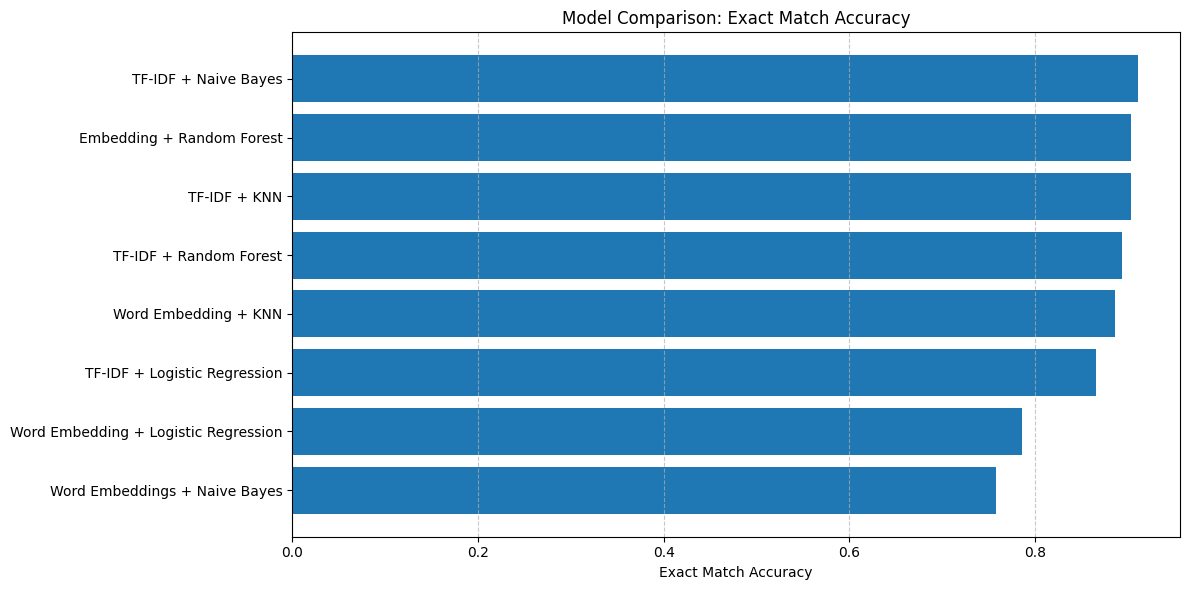

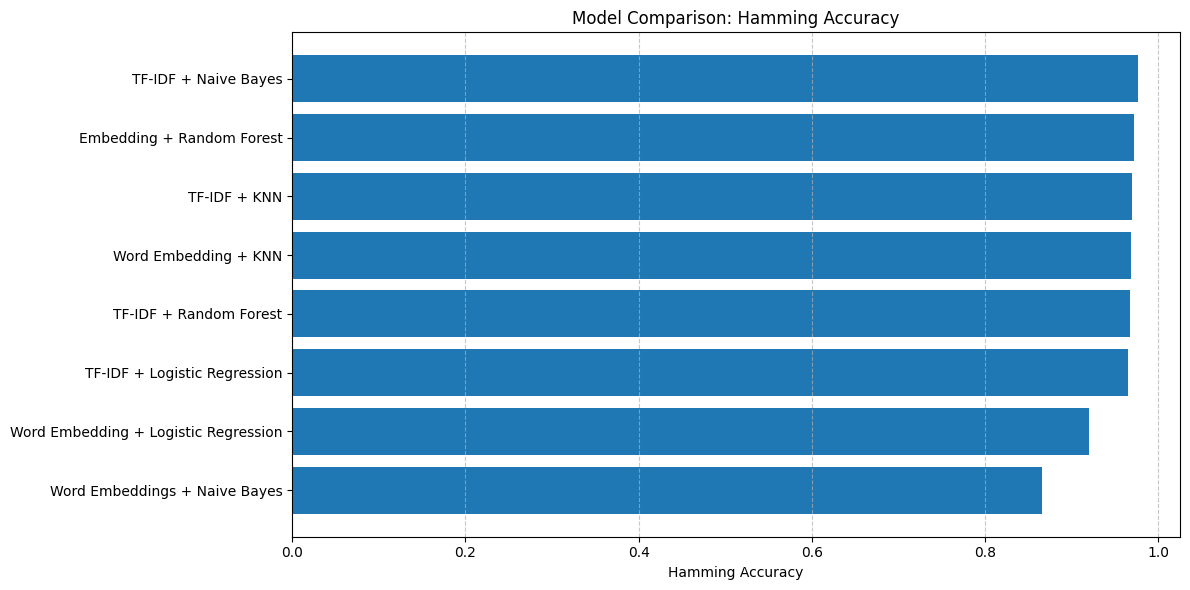

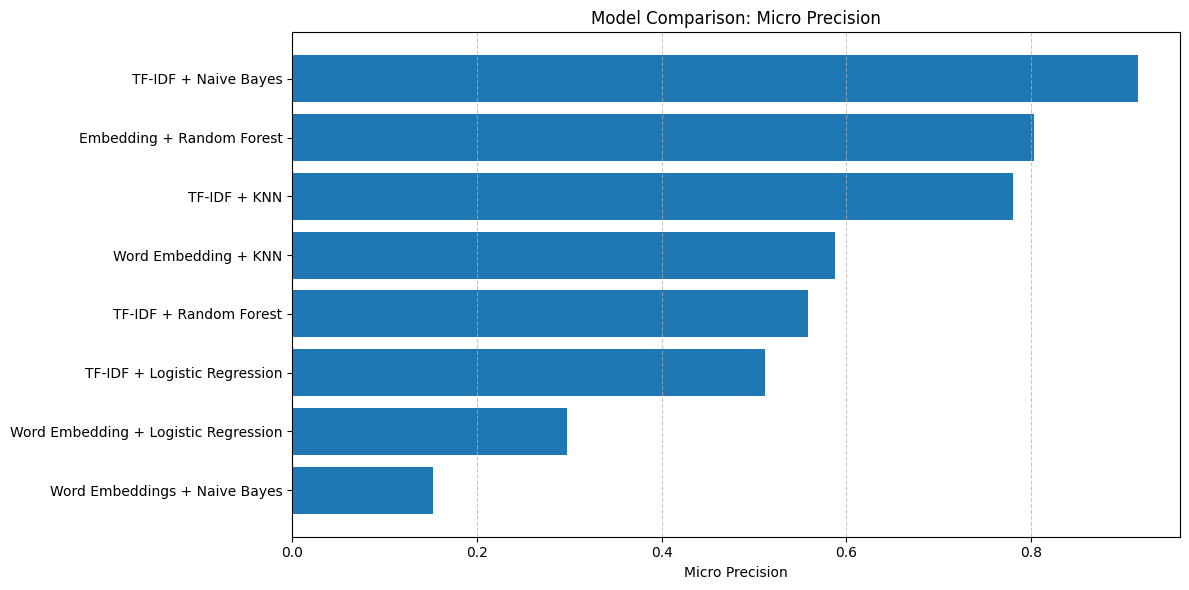

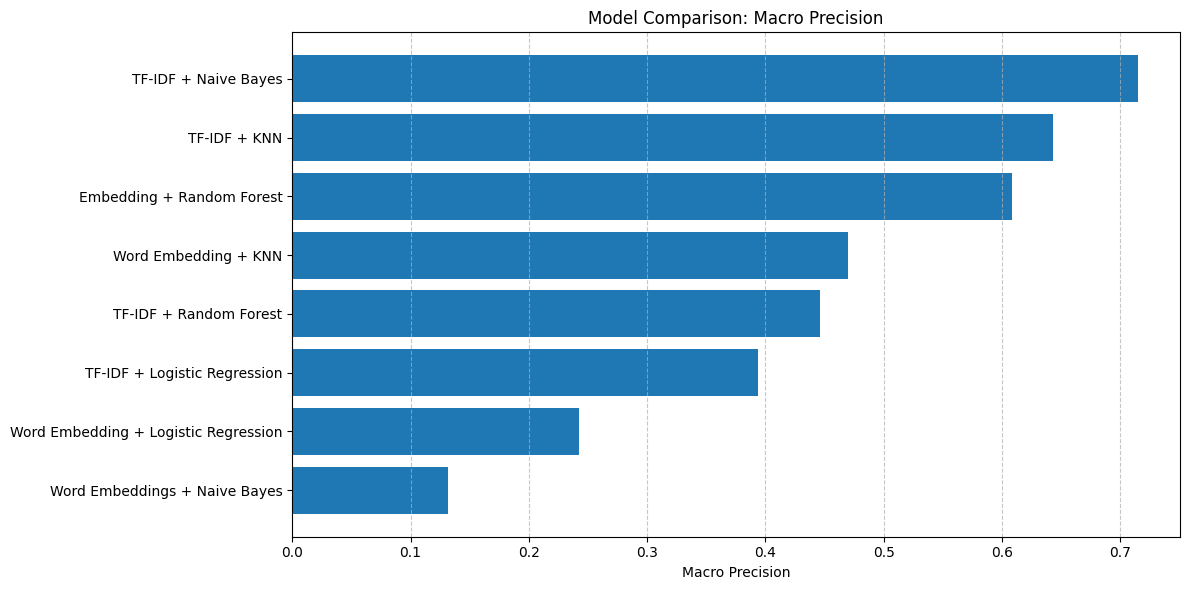

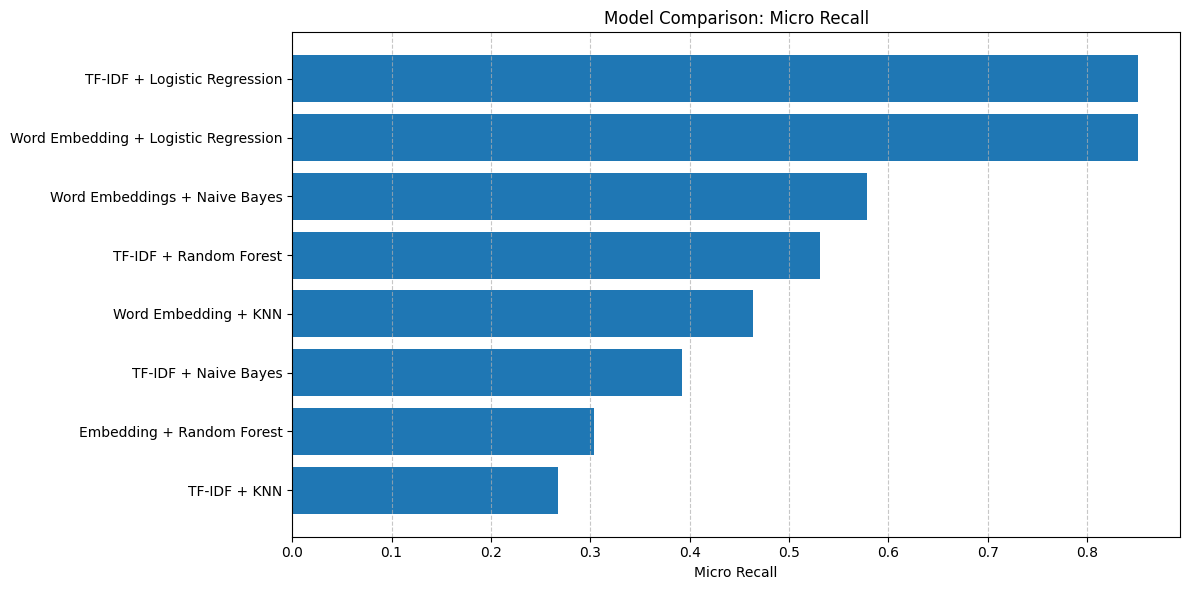

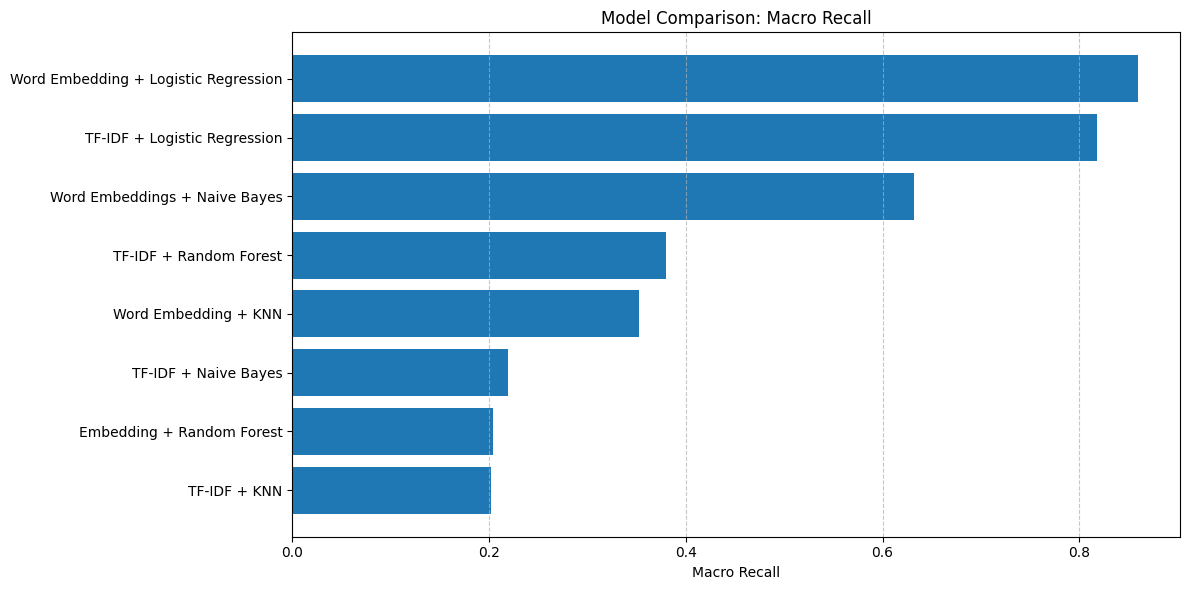

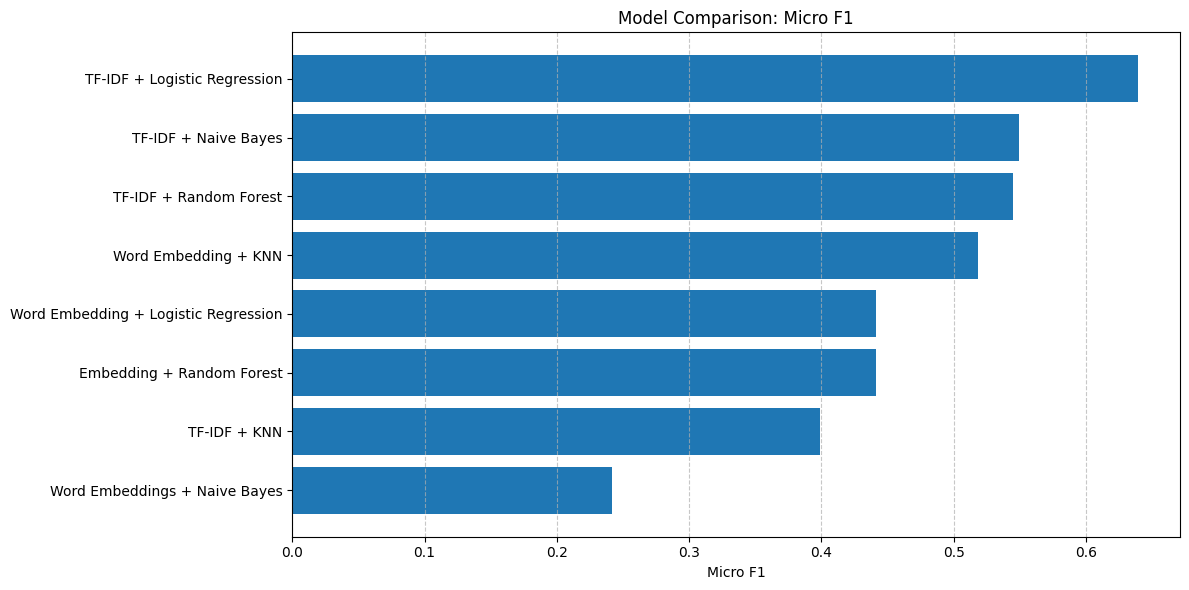

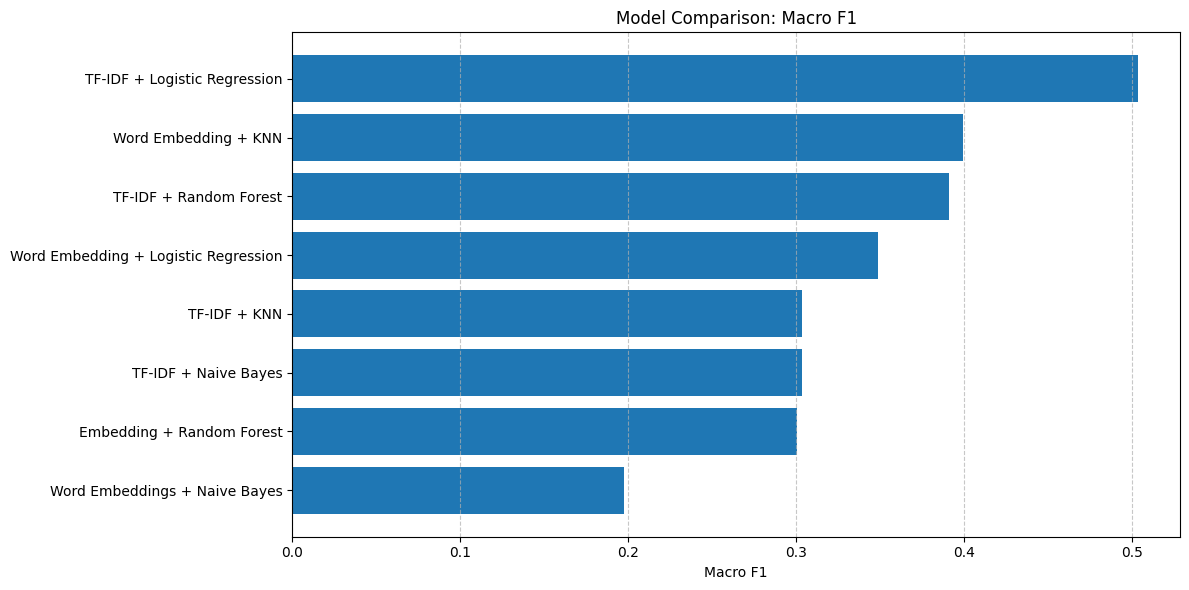

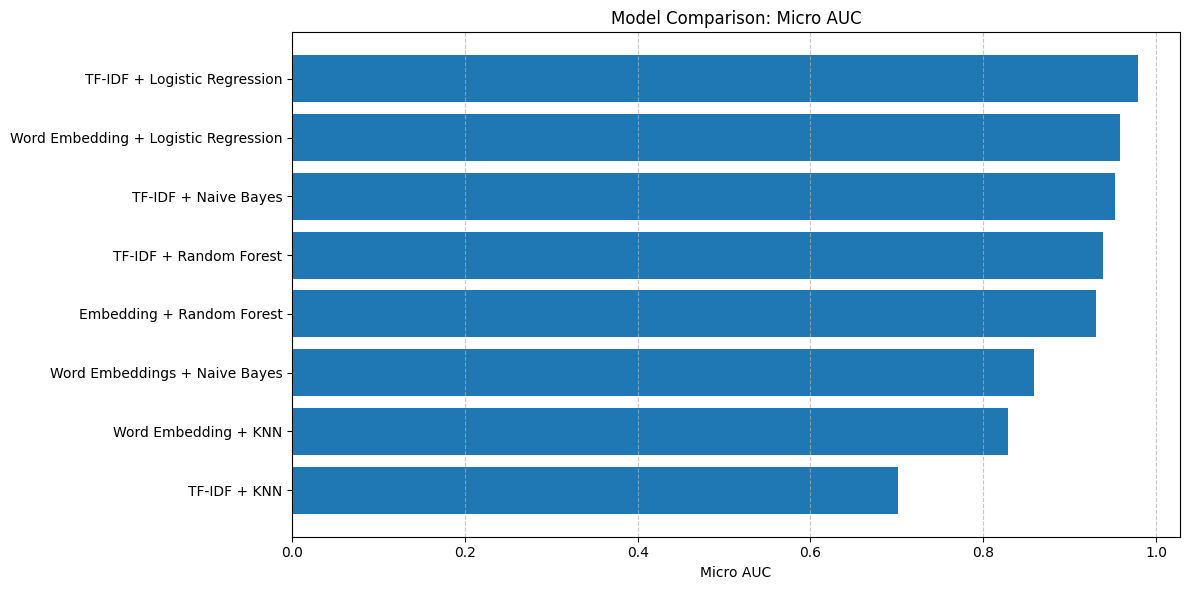

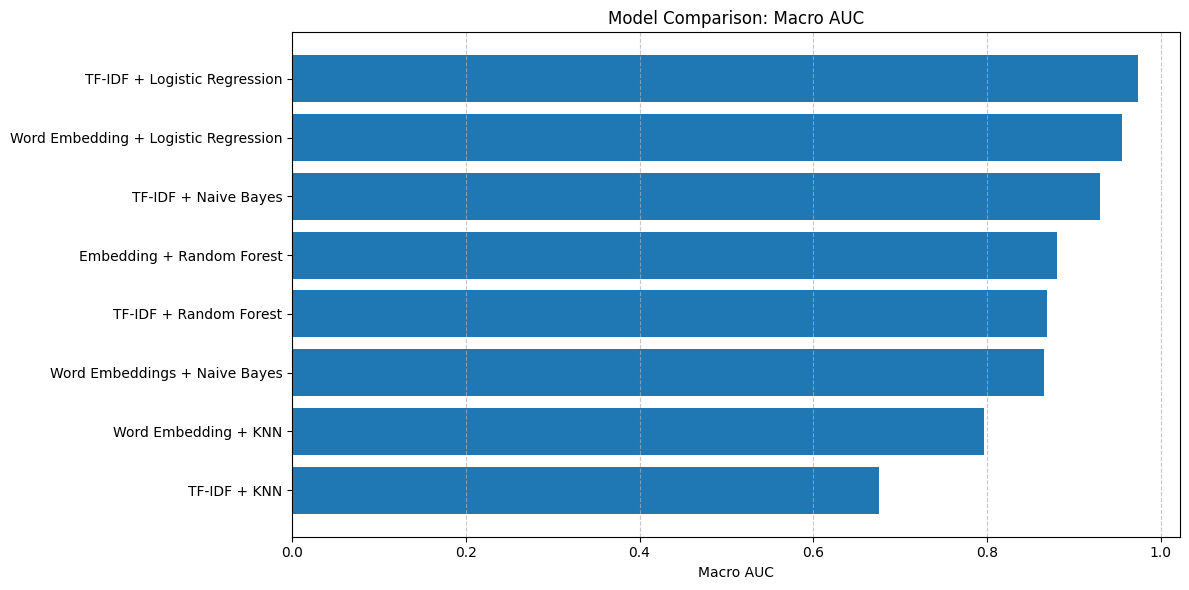

In [ ]:
# Set plotting style
plt.style.use('default')
plt.rcParams.update({'figure.figsize': (12, 6)})

for metric in RESULT_METRICS: # Plot for each metric
    results_df_sorted = results_df.sort_values(by=metric, ascending=False) # Sort by metric value in descending order
    
    plt.figure()
    
    if metric == "Model":
        # Skip model-only plot
        continue
    
    # Use horizontal bar plot for readability
    plt.barh(results_df_sorted["Model"], results_df_sorted[metric])
    plt.xlabel(metric)
    plt.title(f'Model Comparison: {metric}')
    plt.gca().invert_yaxis()  # Highest score at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
metrics = ["Micro Precision", "Micro Recall", "Micro F1", "Micro AUC"] # Metrics to compare
results_df["Mean Score"] = results_df[metrics].mean(axis=1) # Calculate mean score across metrics
best_model_row = results_df.sort_values(by="Mean Score", ascending=False).iloc[0] # Get the row with the best overall performance
print("Best Overall Model:", best_model_row["Model"]) # Print the best overall model

Best Overall Model: TF-IDF + Logistic Regression


Among the models evaluated, TF-IDF + Naive Bayes initially appears promising due to its high micro precision and strong exact match accuracy. However, its performance is undermined by a significantly lower micro recall and micro F1-score, indicating that while it is very cautious and rarely makes false positives, it also misses a large number of true toxic instances. In contrast, TF-IDF + Logistic Regression offers the most balanced performance across all key metrics. It achieves the highest micro F1-score, an excellent micro recall, and the top micro AUC, making it not only accurate in detecting toxic comments but also reliable in distinguishing between toxic and non-toxic cases. This balanced trade-off between precision and recall makes Logistic Regression with TF-IDF the best-performing model overall for this multi-label classification task.

## Visual comparator for top performing model

In [ ]:
def plot_auc_scores(auc_scores, class_labels):
    """ Plot AUC scores for each class per model using a grouped bar chart.
    
    Args:
        auc_scores (dict): AUC score dict with model names as keys and class AUCs inside.
        class_labels (list): List of class names (e.g., ["toxic", "obscene", ...])
    
    Returns: None
    """
    # Build a DataFrame with models as rows and class labels as columns
    data = {
        model: [score_dict["AUC per class"][cls] for cls in class_labels]
        for model, score_dict in auc_scores.items()
    }

    df = pd.DataFrame(data, index=class_labels)

    # Plot
    ax = df.T.plot(kind="bar", figsize=(12, 6))
    ax.set_title("AUC Scores per Class")
    ax.set_ylabel("AUC Score")
    ax.set_xlabel("Model")
    ax.set_ylim(0.0, 1.05)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_grouped_auc_scores(auc_scores, class_labels):
    """
    Plots grouped bar chart of AUC scores for each class and model.

    Args:
        auc_scores (dict): Dictionary of model names to AUC values.
        class_labels (list): List of class names to plot.

    Returns: None
    """
    models = list(auc_scores.keys())
    n_classes = len(class_labels)
    n_models = len(models)
    bar_width = 0.12

    x = np.arange(n_classes) # positions for classes

    plt.figure(figsize=(14, 6))

    for i, model in enumerate(models): # Plot AUC scores for each class and model separately
        scores = [auc_scores[model]["AUC per class"][cls] for cls in class_labels]
        plt.bar(x + i * bar_width, scores, width=bar_width, label=model)

    plt.xticks(x + (n_models / 2 - 0.5) * bar_width, class_labels, rotation=45)
    plt.ylabel("AUC Score")
    plt.title("AUC Scores by Class and Model")
    plt.ylim(0, 1.05)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def plot_macro_micro_auc(auc_scores):
    """ Function to plot Macro and Micro AUC scores for each model.
    Args:
        auc_scores (dict): A dictionary with AUC scores for each model.
    
    Returns: None
    """
    df = pd.DataFrame([
        {"Model": model, "Macro AUC": scores["Macro AUC"], "Micro AUC": scores["Micro AUC"]}
        for model, scores in auc_scores.items()
    ]) # Create DataFrame with model names and AUC scores
    
    df.set_index("Model").plot(kind='bar', figsize=(8, 5))
    plt.title("Macro vs Micro AUC")
    plt.ylabel("AUC Score")
    plt.xticks(rotation=45)
    plt.ylim(0.0, 1.05)
    plt.tight_layout()
    plt.show()

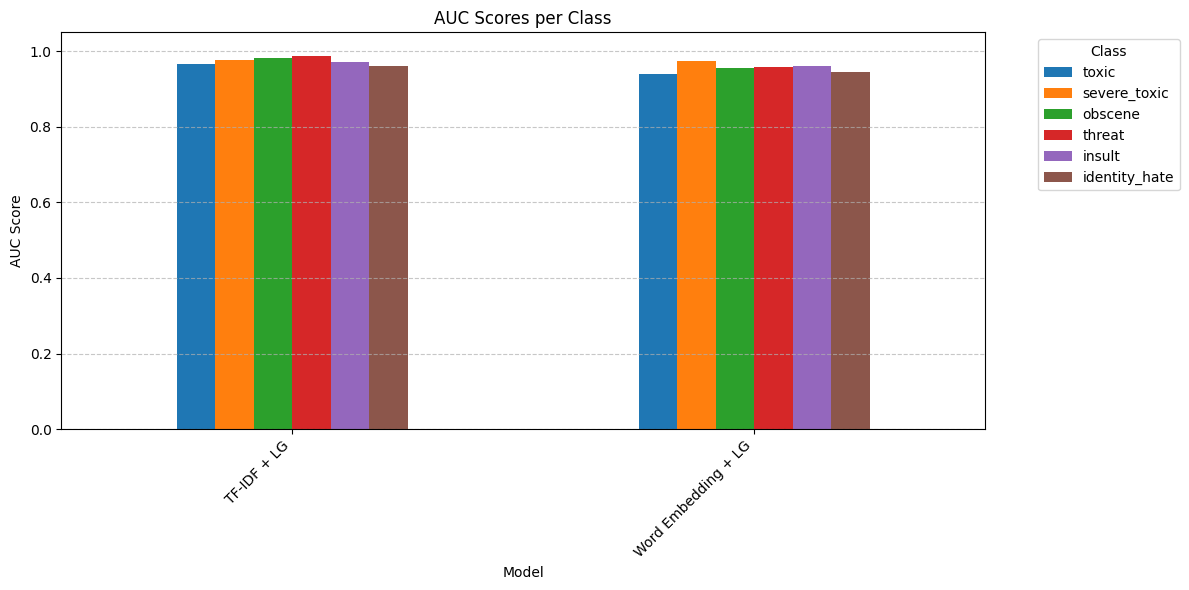

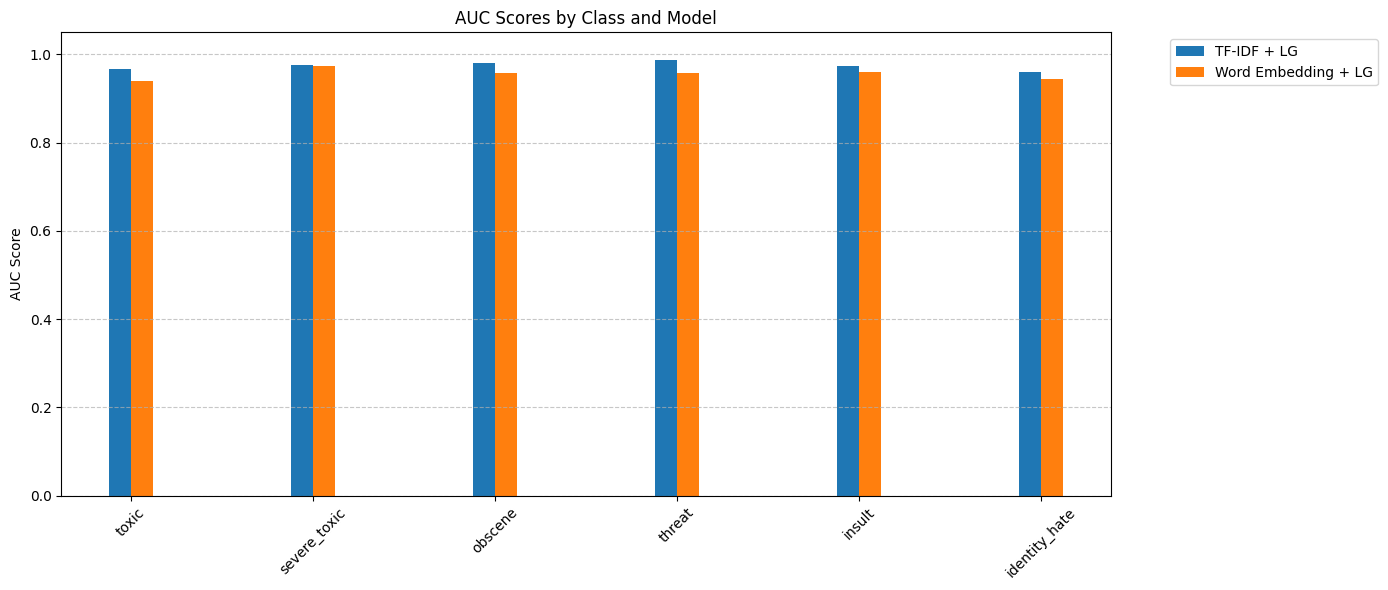

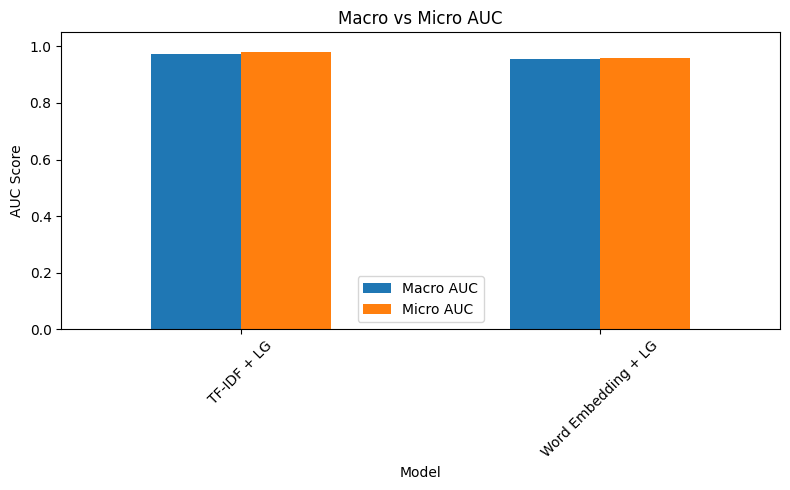

In [ ]:
auc_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

plot_auc_scores(auc_scores, auc_labels)
plot_grouped_auc_scores(auc_scores, auc_labels)
plot_macro_micro_auc(auc_scores)

## Other visuals

In [ ]:
# Visualisation helpers
def bar_true_vs_pred(y_true: pd.DataFrame,
                     y_pred: np.ndarray,
                     labels: list,
                     title_suffix: str = ""):
    """ Plot true vs. predicted counts for each class.

    Args: 
        y_true (pd.DataFrame): True labels.
        y_pred (np.ndarray): Predicted labels.
        labels (list): List of label names.
        title_suffix (str, optional): Additional suffix for the title. Defaults to "".
    
    Returns: None, but displays a bar plot of the true vs. predicted counts for each class.
    """
    true_counts = y_true.values.sum(axis=0)
    pred_counts = y_pred.sum(axis=0)

    x = np.arange(len(labels))
    plt.figure(figsize=(10, 5))
    plt.bar(x - .2, true_counts,  width=.4, label="True", color="steelblue")
    plt.bar(x + .2, pred_counts, width=.4, label="Pred", color="tomato")

    plt.xticks(x, labels, rotation=45, ha="right")
    plt.ylabel("Samples")
    plt.title(f"True vs. Predicted counts {title_suffix}")
    plt.legend()
    plt.tight_layout()
    plt.show()


def per_label_confusion_matrices(y_true: pd.DataFrame,
                                 y_pred: np.ndarray,
                                 labels: list,
                                 cmap="YlOrRd"): # YellowOrangeRed color map for confusion matrices.
    """ Create confusion matrices for each label.
    
    Args:
        y_true (pd.DataFrame): True labels.
        y_pred (np.ndarray): Predicted labels.
        labels (list): List of label names.
        cmap (str, optional): Color map for the heatmap. Defaults to "YlOrRd".
        
    Returns: None, but displays confusion matrices for each label.
    """
    n = len(labels)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(4*ncols, 4*nrows),
                             squeeze=False)
    for idx, lab in enumerate(labels):
        r, c = divmod(idx, ncols)
        cm = confusion_matrix(y_true[lab], y_pred[:, idx])
        sns.heatmap(cm,
                    annot=True, fmt="d",
                    cbar=False, cmap=cmap,
                    ax=axes[r, c])
        axes[r, c].set_title(lab)
        axes[r, c].set_xlabel("Predicted")
        axes[r, c].set_ylabel("True")
    # turn off empty plots
    for j in range(idx+1, nrows*ncols):
        r, c = divmod(j, ncols)
        axes[r, c].axis("off")
    plt.tight_layout()
    plt.show()


def per_label_roc_curves(y_true: pd.DataFrame,
                         y_prob: np.ndarray,
                         labels: list):
    """ Draw ROC curve for every label (works if you have probability scores).
    
    Args:
        y_true (pd.DataFrame): True labels.
        y_prob (np.ndarray): Predicted labels.
        labels (list): List of label names.

    Returns: None, but displays ROC curves for each label.
    """
    plt.figure(figsize=(6, 6))
    for i, lab in enumerate(labels):
        fpr, tpr, _ = roc_curve(y_true[lab], y_prob[:, i])
        auc  = roc_auc_score(y_true[lab], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{lab} (AUC={auc:.3f})")
    plt.plot([0, 1], [0, 1], "--", color="grey")
    plt.xlabel("False-positive rate")
    plt.ylabel("True-positive rate")
    plt.title("ROC curves (per label)")
    plt.legend()
    plt.tight_layout()
    plt.show()


def classification_table(y_true: pd.DataFrame,
                         y_pred: np.ndarray,
                         labels: list):
    """ Create a classification report table and display it.
    Args:
        y_true (pd.DataFrame): True labels in a binary format.
        y_pred (np.ndarray): Predicted binary labels.
        labels (list): List of class names.
    Returns:
        pd.DataFrame: DataFrame with classification report metrics.
    """
    report = classification_report(y_true.values,
                                   y_pred,
                                   target_names=labels,
                                   output_dict=True,
                                   zero_division=0)
    df = (pd.DataFrame(report).T
            .drop(["accuracy", "macro avg", "weighted avg",
                   "micro avg", "samples avg"],
                  errors="ignore"))            # <-- key change
    display(df.style.format("{:.3f}")
                  .background_gradient(cmap="Blues"))
    return df


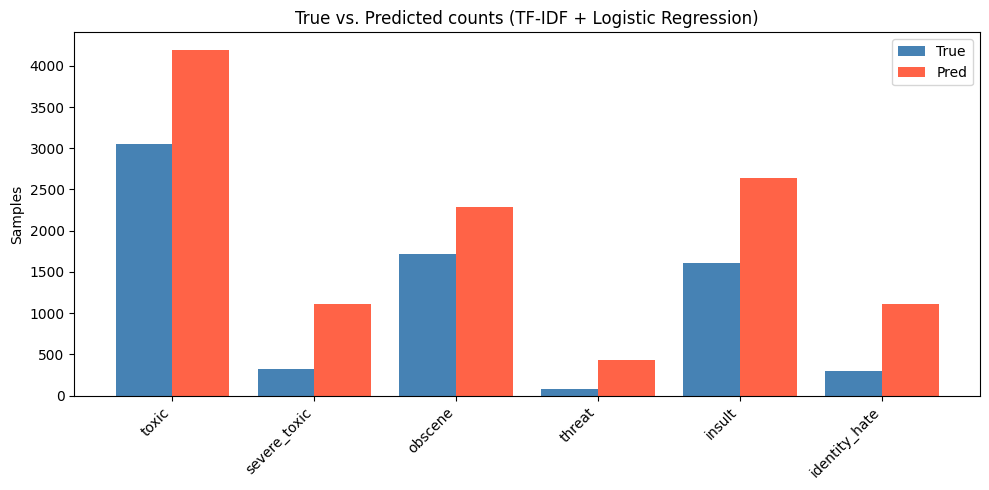

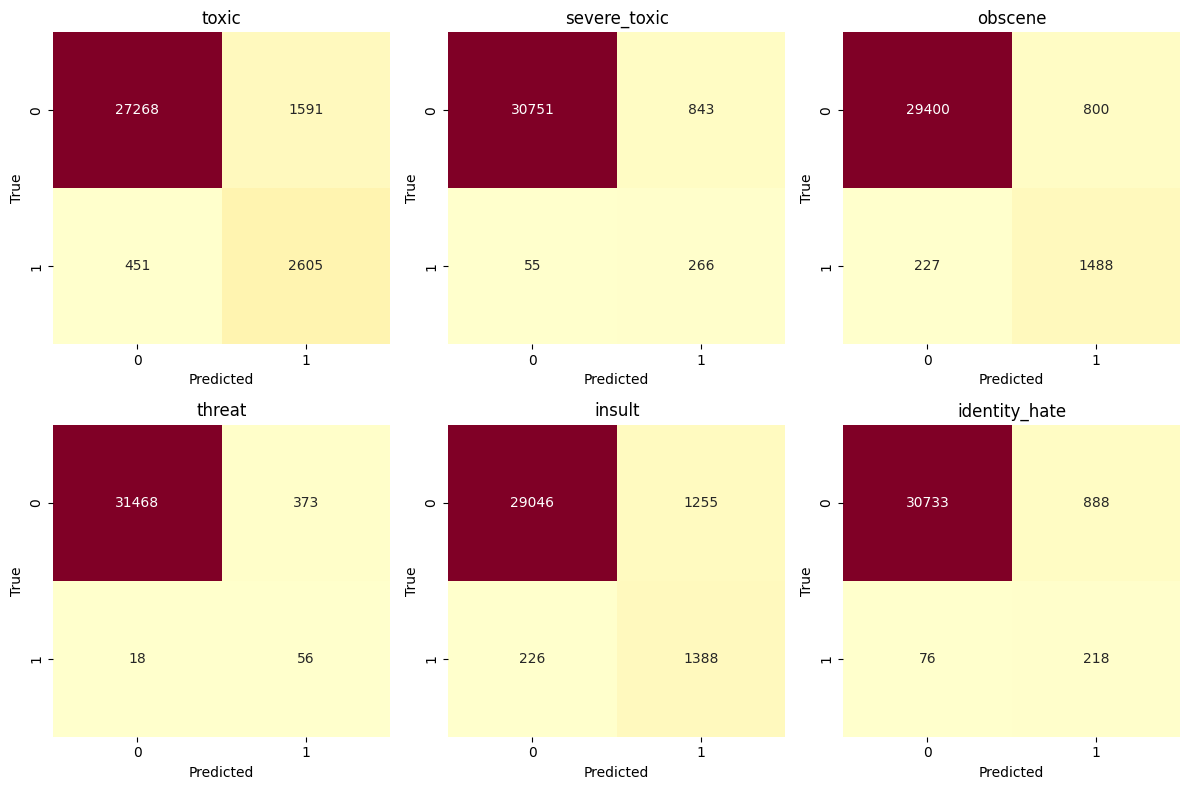

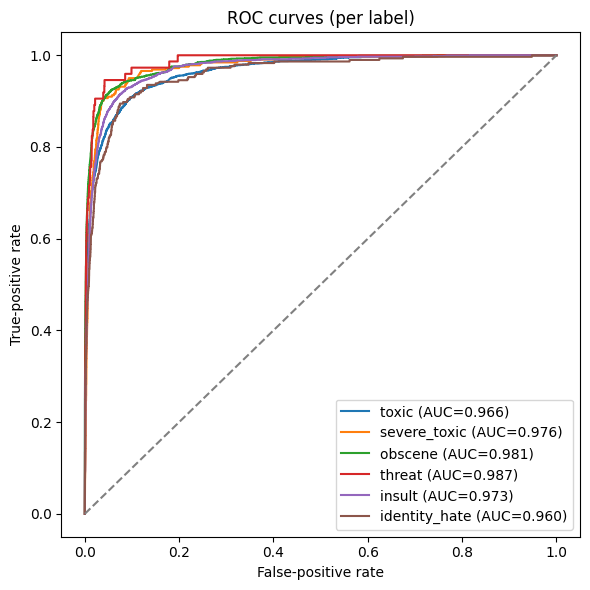

,precision,recall,f1-score,support
toxic,0.621,0.852,0.718,3056.000
severe_toxic,0.240,0.829,0.372,321.000
obscene,0.650,0.868,0.743,1715.000
threat,0.131,0.757,0.223,74.000
insult,0.525,0.860,0.652,1614.000
identity_hate,0.197,0.741,0.311,294.000


,precision,recall,f1-score,support
toxic,0.620829,0.852421,0.718423,3056.0
severe_toxic,0.239856,0.828660,0.372028,321.0
obscene,0.650350,0.867638,0.743442,1715.0
threat,0.130536,0.756757,0.222664,74.0
insult,0.525161,0.859975,0.652102,1614.0
identity_hate,0.197107,0.741497,0.311429,294.0


In [ ]:
y_true_lg_tfidf = y_val_tfidf
y_pred_lg_tfidf = model_lg_tfidf.predict(X_combined_tfidf_val)
y_prob_lg_tfidf = model_lg_tfidf.predict_proba(X_combined_tfidf_val)

bar_true_vs_pred(y_true_lg_tfidf, y_pred_lg_tfidf, labels, "(TF-IDF + Logistic Regression)")
per_label_confusion_matrices(y_true_lg_tfidf, y_pred_lg_tfidf, labels)
per_label_roc_curves(y_true_lg_tfidf, y_prob_lg_tfidf, labels)
classification_table(y_true_lg_tfidf, y_pred_lg_tfidf, labels)

The per-label confusion matrices provide a clear breakdown of the classifier's strengths and weaknesses across each class. While the model performs well on more common labels like toxic, obscene, and insult, showing a good balance between precision and recall, it struggles significantly with rare classes such as severe_toxic and threat, often failing to identify any true positives. This highlights a common issue in multilabel classification: imbalanced label distribution can lead to poor recall for underrepresented classes. Overall, the matrices reinforce earlier AUC and F1 findings, offering valuable insight into where the model is reliable and where further tuning or data augmentation may be needed.

# 9. Create Kaggle submission file

In [ ]:
TEST_FEATURES_PATH = "processed_test_features.pkl"

nlp_test = spacy.load("en_core_web_md", disable=["parser", "ner", "tagger"])
nlp_test.add_pipe("sentencizer")

if os.path.exists(TEST_FEATURES_PATH):
    print("Loaded cached test features.")
    df_test_processed = pd.read_pickle(TEST_FEATURES_PATH)
else:
    print("Processing and extracting features from test.csv ...")

    features_test = df_test['comment_text'].apply(extract_features, is_train=False, nlp_model=nlp_test)
    features_test_df = pd.json_normalize(features_test, sep='_')

    df_test = df_test.reset_index(drop=True)
    features_test_df = features_test_df.reset_index(drop=True)

    df_test_processed = pd.concat([df_test, features_test_df], axis=1)

    # Save for future use
    df_test_processed.to_pickle(TEST_FEATURES_PATH)
    print(f"Saved test features to {TEST_FEATURES_PATH}")

Processing and extracting features from test.csv ...


C:\Users\Zaid.Qarout\AppData\Local\miniconda3\envs\jupyter-env\Lib\site-packages\spacy\pipeline\lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Saved test features to processed_test_features.pkl


In [ ]:
# TF-IDF + Sentiment
X_test_tokens = df_test_processed['tokens'].apply(lambda tokens: " ".join(tokens)) # Join tokens to form sentences
X_test_tfidf = tfidf_vec.transform(X_test_tokens) # Transform tokens to TF-IDF vectors

X_test_sentiment = df_test_processed[['sentiment_scores_polarity', 'sentiment_scores_subjectivity']] # Extract sentiment scores
X_test_sentiment_sparse = csr_matrix(X_test_sentiment.values) # Convert sentiment scores to sparse format

X_test_combined_tfidf = hstack([X_test_tfidf, X_test_sentiment_sparse]) # Combine TF-IDF and sentiment features

In [ ]:
final_model = model_lg_tfidf  # Logistic Regression with TF-IDF

# Predict probabilities
y_test_proba = get_probabilities(final_model, X_test_combined_tfidf)  # shape: (n_samples, 6)

# Create submission DataFrame
submission = pd.DataFrame(y_test_proba, columns=labels)
submission.insert(0, 'id', df_test['id'])  # Insert ID as the first column

# Save to CSV for Kaggle
submission.to_csv("submission.csv", index=False)
print("Submission saved to 'submission.csv'")


Submission saved to 'submission.csv'


Debugging is below

In [74]:
example = ["you are a stupid idiot and everyone hates you"]
example_tokens = [" ".join([t.lemma_.lower() for t in nlp_test(example[0]) if not t.is_stop and not t.is_punct])]
X_example_tfidf = tfidf_vec.transform(example_tokens)
X_example_sentiment = csr_matrix([[0.5, 0.8]])  # dummy values
X_example_combined = hstack([X_example_tfidf, X_example_sentiment])

y_example_pred = final_model.predict_proba(X_example_combined)
print(y_example_pred)

[[0.99999975 0.33265503 0.99934805 0.0320099  0.99999936 0.77999879]]


C:\Users\Zaid.Qarout\AppData\Local\miniconda3\envs\jupyter-env\Lib\site-packages\spacy\pipeline\lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [77]:
print(y_test_proba[:5])

[[0.99952436 0.88020568 0.99977617 0.43534007 0.99552567 0.80609274]
 [0.0240773  0.00694374 0.00442522 0.00579679 0.02359536 0.01603347]
 [0.32573815 0.05386958 0.12017217 0.01046372 0.13618023 0.18250655]
 [0.02066521 0.00954164 0.01084673 0.00257714 0.01357953 0.00232516]
 [0.37742097 0.02477012 0.29695803 0.01486311 0.17751273 0.08960542]]


In [78]:
print(submission.head())
print(y_test_proba.mean(), y_test_proba.min(), y_test_proba.max())

                 id     toxic  severe_toxic   obscene    threat    insult  \
0  00001cee341fdb12  0.999524      0.880206  0.999776  0.435340  0.995526   
1  0000247867823ef7  0.024077      0.006944  0.004425  0.005797  0.023595   
2  00013b17ad220c46  0.325738      0.053870  0.120172  0.010464  0.136180   
3  00017563c3f7919a  0.020665      0.009542  0.010847  0.002577  0.013580   
4  00017695ad8997eb  0.377421      0.024770  0.296958  0.014863  0.177513   

   identity_hate  
0       0.806093  
1       0.016033  
2       0.182507  
3       0.002325  
4       0.089605  
0.18101932644150173 2.8251938639091326e-05 0.9999999999999456
